In [1]:
#scan.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 2 August 2020.
#inspect the output of all simulations launched by scan.py

In [2]:
#get paths to all simulations
import os
parent_path = 'permutations/'
paths = os.listdir(parent_path)
paths.remove('.gitignore')
paths = [parent_path + path for path in paths]
print 'number of paths = ', len(paths)
paths[0:5]

number of paths =  125


['permutations/total_ring_mass=8e-11_radial_width=0.0006_shear_viscosity=2e-10_sim_id=17_timesteps_per_output=1_',
 'permutations/total_ring_mass=4e-10_radial_width=0.0012_shear_viscosity=5e-12_sim_id=34_timesteps_per_output=38_',
 'permutations/total_ring_mass=5e-08_radial_width=0.0012_shear_viscosity=1e-12_sim_id=104_timesteps_per_output=10716_',
 'permutations/total_ring_mass=1e-08_radial_width=0.0004_shear_viscosity=1e-12_sim_id=76_timesteps_per_output=3712_',
 'permutations/total_ring_mass=5e-08_radial_width=0.0004_shear_viscosity=5e-12_sim_id=106_timesteps_per_output=8300_']

In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.max_open_warning': 0})
import numpy as np
import pandas as pd

In [4]:
#order paths by sim_id
data = []
for p in paths:
    str_id = int(p.split('sim_id=')[1].split('_timesteps_per_output=')[0])
    d = {'sim_id':str_id, 'path':p}
    data += [d]
paths_df = pd.DataFrame(data)[['sim_id', 'path']].sort_values('sim_id').reset_index(drop=True)
paths_df.head()

sim_id                                               path
0       0  permutations/total_ring_mass=8e-11_radial_widt...
1       1  permutations/total_ring_mass=8e-11_radial_widt...
2       2  permutations/total_ring_mass=8e-11_radial_widt...
3       3  permutations/total_ring_mass=8e-11_radial_widt...
4       4  permutations/total_ring_mass=8e-11_radial_widt...

helper_fns.py:29: RuntimeWarning: invalid value encountered in greater
  idx = angle > np.pi
helper_fns.py:31: RuntimeWarning: invalid value encountered in less
  idx = angle < -np.pi
libration.py:56: RuntimeWarning: invalid value encountered in greater
  idx = (dwt > np.pi)
libration.py:58: RuntimeWarning: invalid value encountered in less
  idx = (dwt < -np.pi)


sim_id  expected_timestep  current_timestep  \
0         0              42000              2100   
1         1              29000             10150   
2         2              24000             10800   
3         3              21000             12600   
4         4              17000             13600   
5         5              18000               900   
6         6              13000             13000   
7         7              10000             10000   
8         8               9000              9000   
9         9               7000              7000   
10       10               7000               350   
11       11               5000              5000   
12       12               4000              4000   
13       13               3000              3000   
14       14               3000              3000   
15       15               2000               100   
16       16               2000              2000   
17       17               1000              1000   
18       18               1000              1000   
19       19               1000              1000   
20       20               1000              1000   
21       21               1000              1000   
22       22               1000              1000   
23       23               1000              1000   
24       24               1000              1000   
25       25             210000             10500   
26       26             148000            148000   
27       27             121000             18150   
28       28             105000             15750   
29       29              85000             17000   
..      ...                ...               ...   
95       95             166000             33200   
96       96             117000             29250   
97       97              95000             28500   
98       98              83000             29050   
99       99              67000             40200   
100     100           26250000           1312500   
101     101           18561000            928050   
102     102           15155000            757750   
103     103           13125000            656250   
104     104           10716000            535800   
105     105           11739000            586950   
106     106            8300000            415000   
107     107            6777000            338850   
108     108            5869000            293450   
109     109            4792000            239600   
110     110            4792000            239600   
111     111            3388000            169400   
112     112            2766000            138300   
113     113            2396000            119800   
114     114            1956000            195600   
115     115            1856000             92800   
116     116            1312000            131200   
117     117            1071000            107100   
118     118             928000             92800   
119     119             757000            113550   
120     120             830000             41500   
121     121             586000             58600   
122     122             479000             47900   
123     123             415000             41500   
124     124             338000             50700   

     streamline_crossing_timestep  times_viscous_max  total_ring_mass  \
0                            14.0                  0     8.000000e-11   
1                          8975.0                  0     8.000000e-11   
2                         10623.0                  0     8.000000e-11   
3                         12175.0                  0     8.000000e-11   
4                         12941.0                  0     8.000000e-11   
5                            14.0                  0     8.000000e-11   
6                             NaN                  2     8.000000e-11   
7                             NaN                  0     8.000000e-11   
8                             NaN                  0     8.000000e-11   
9                             NaN                 

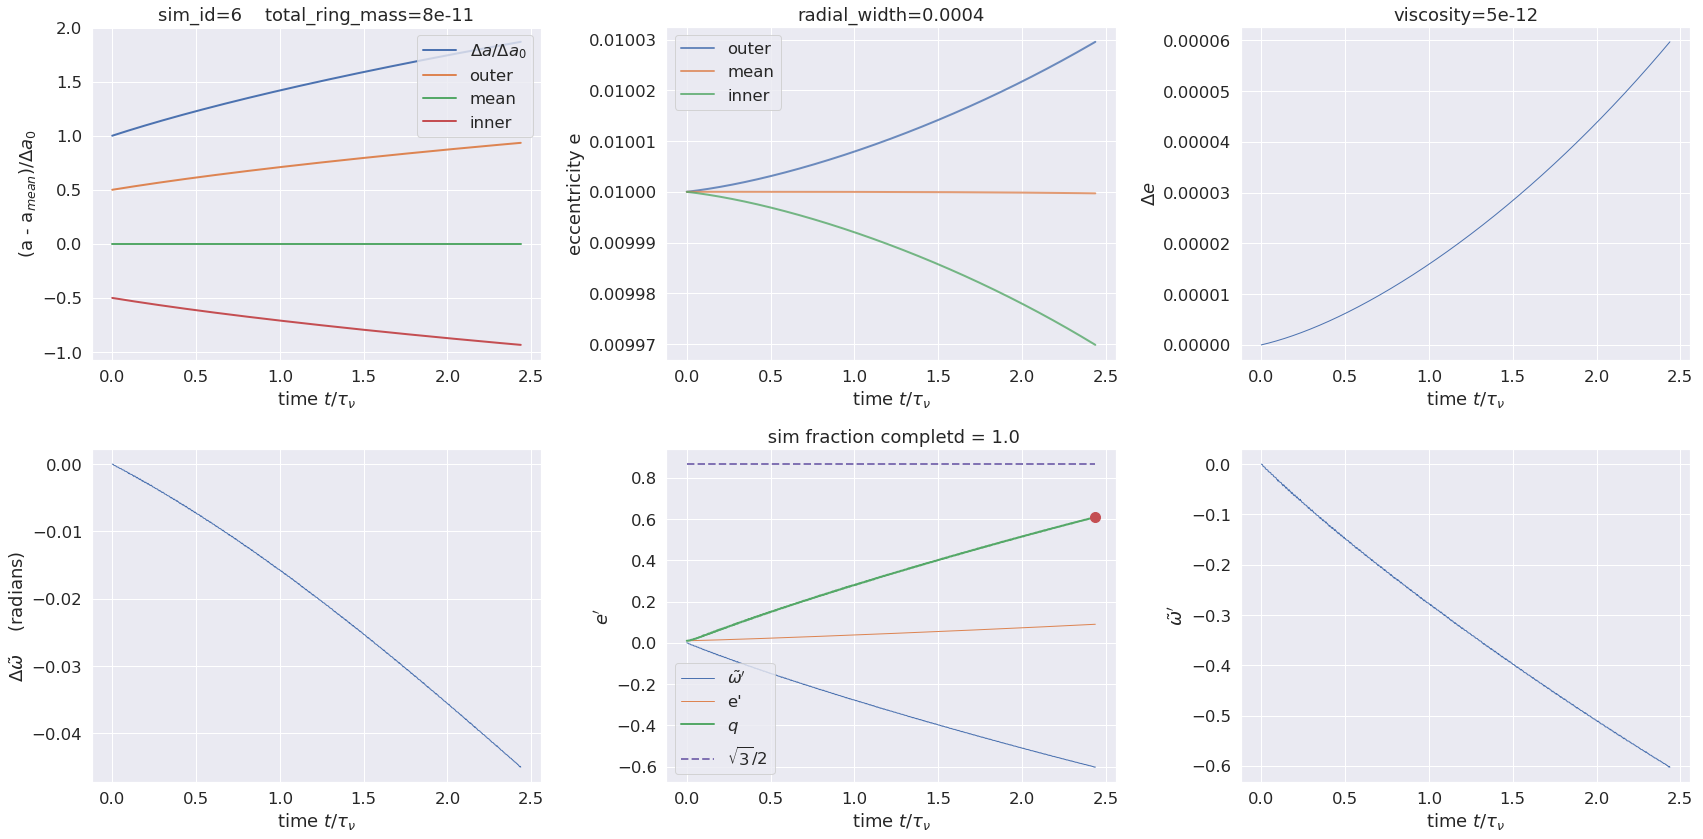

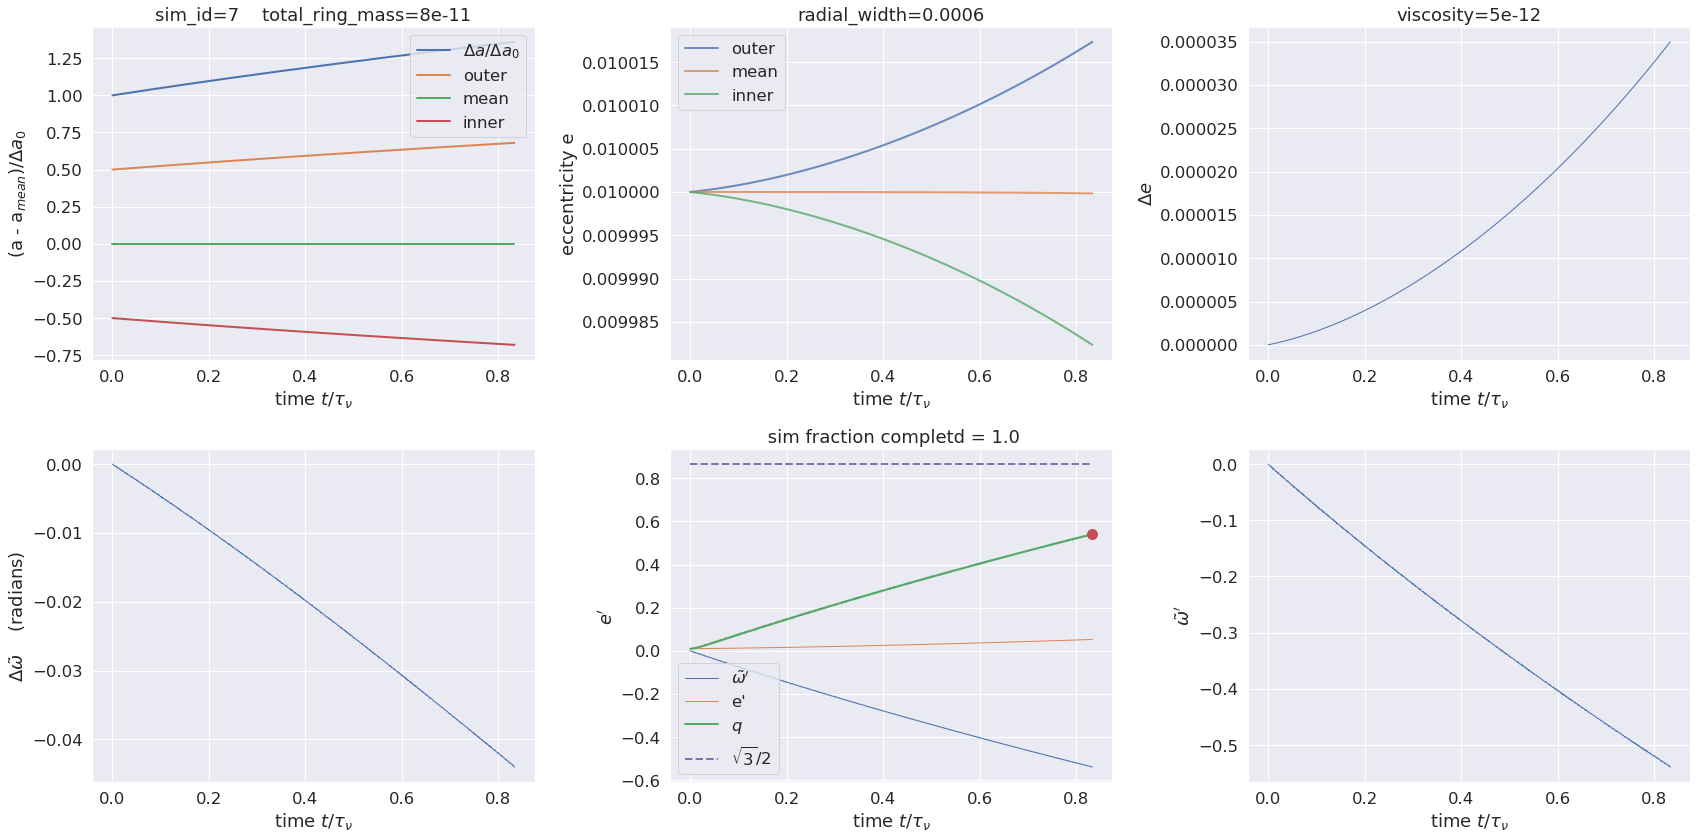

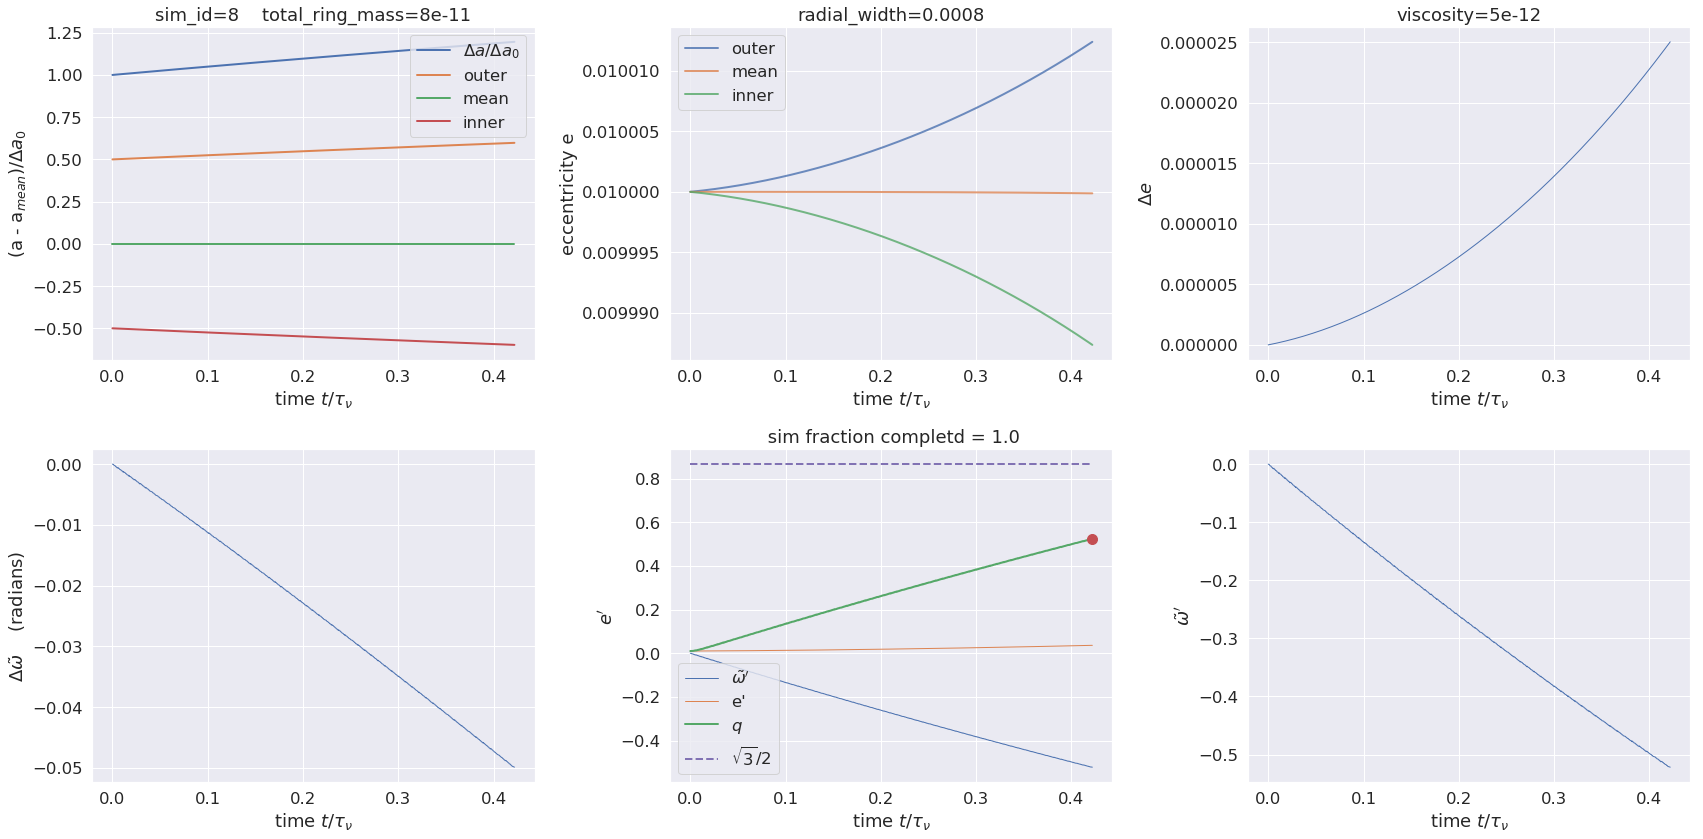

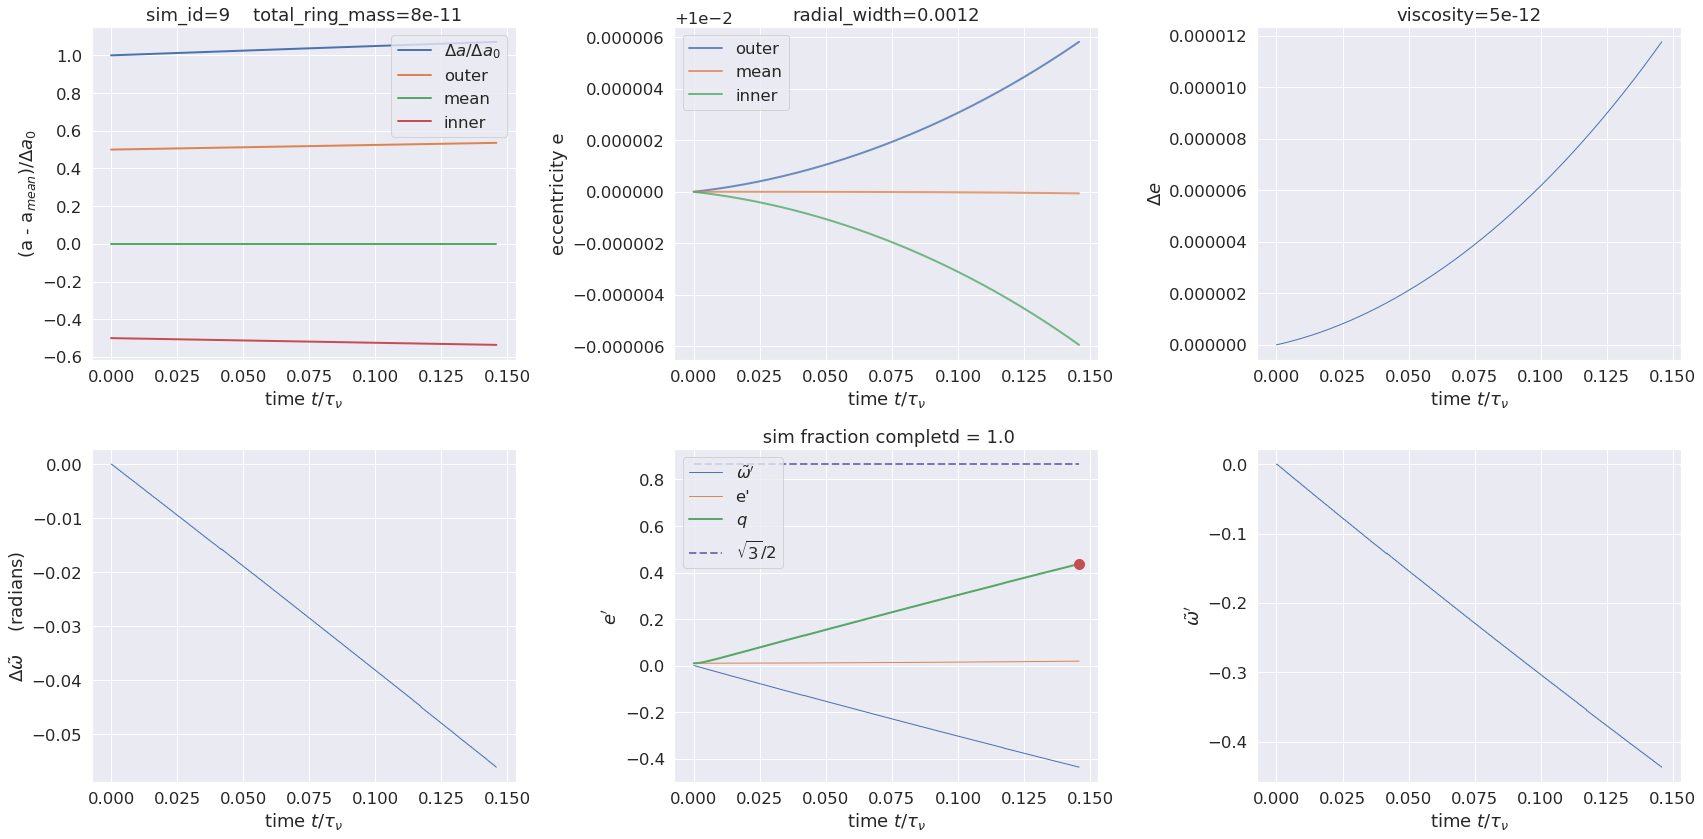

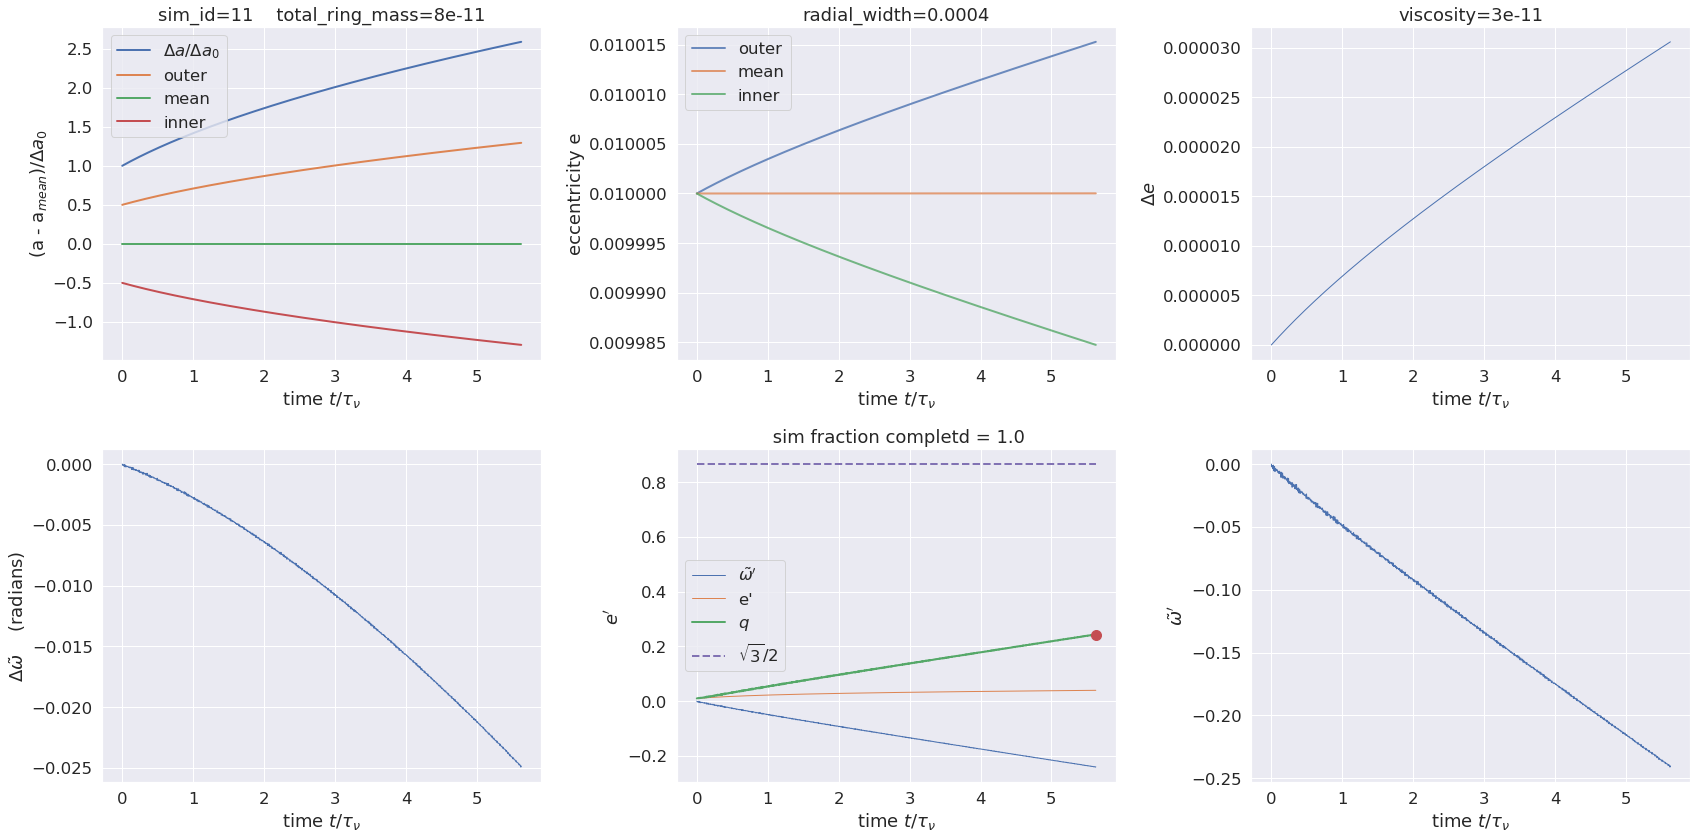

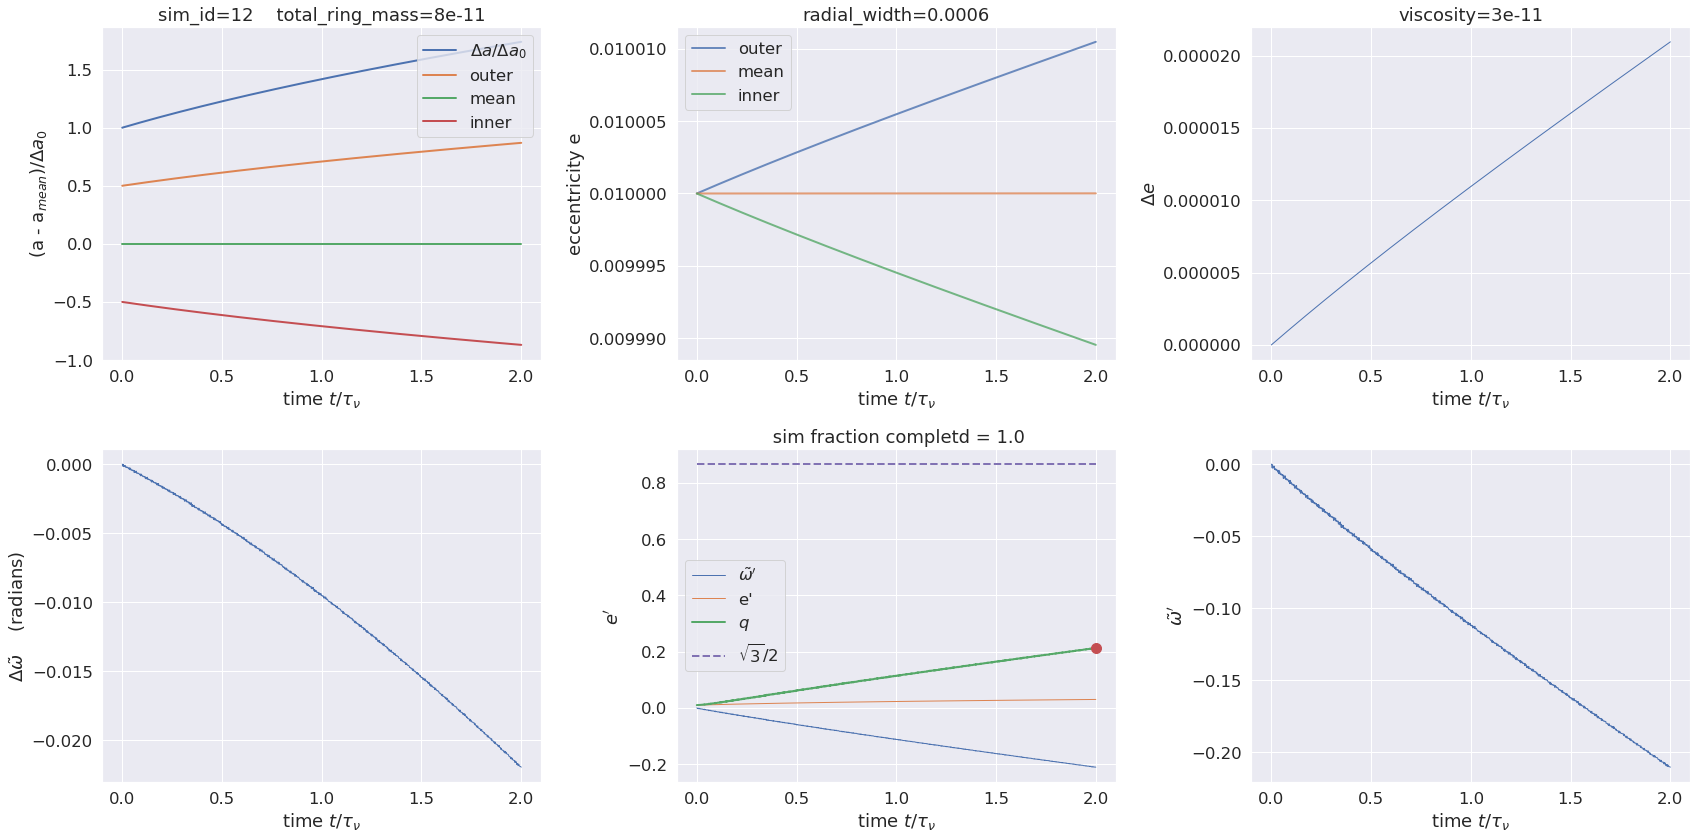

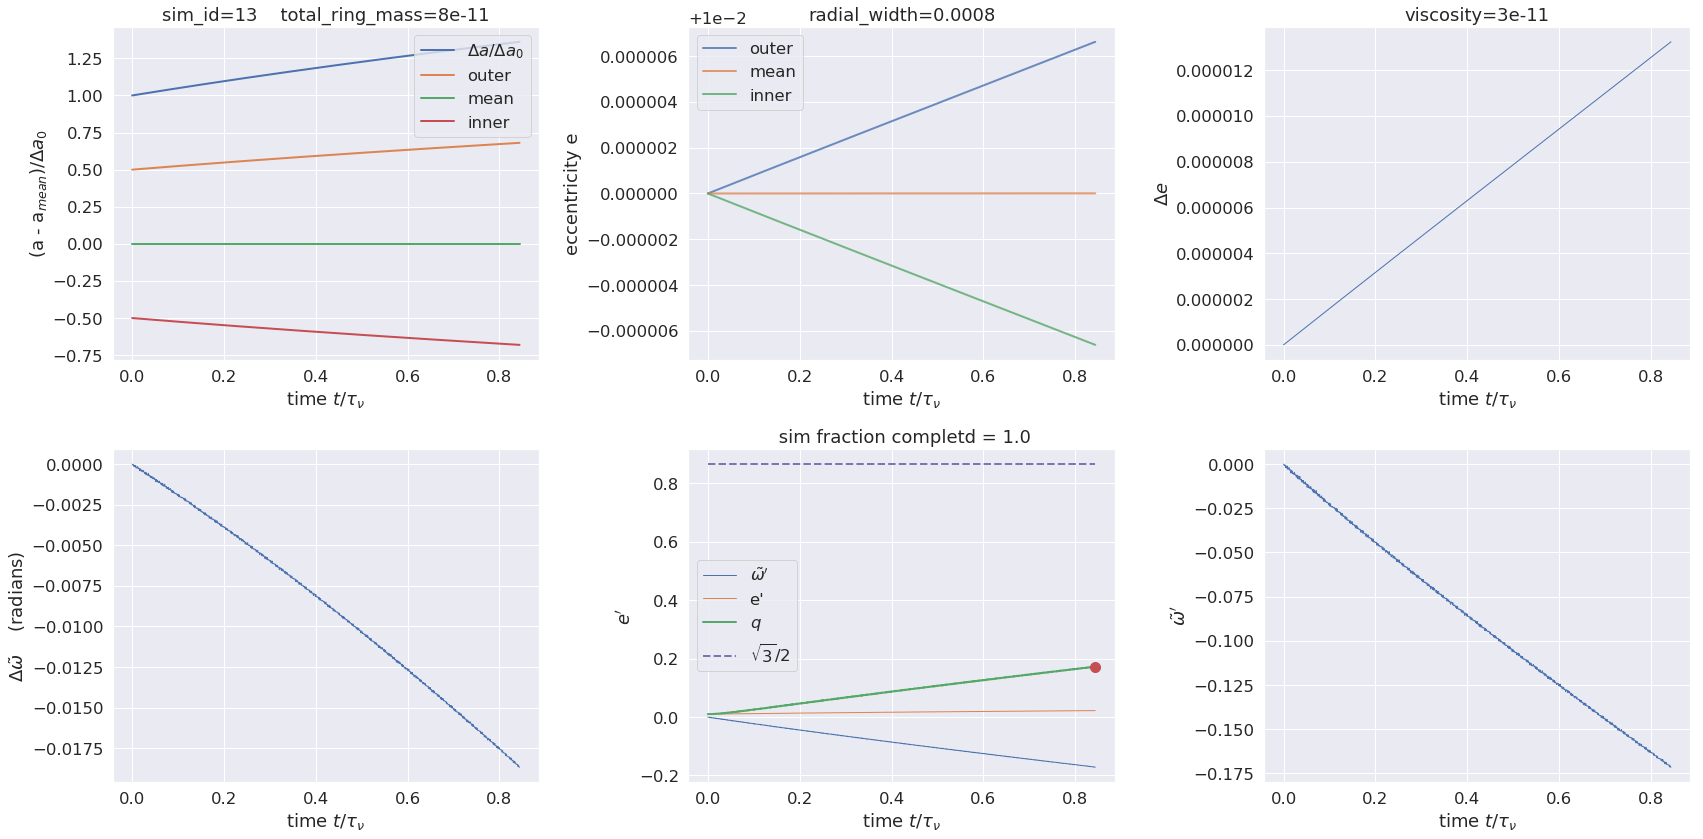

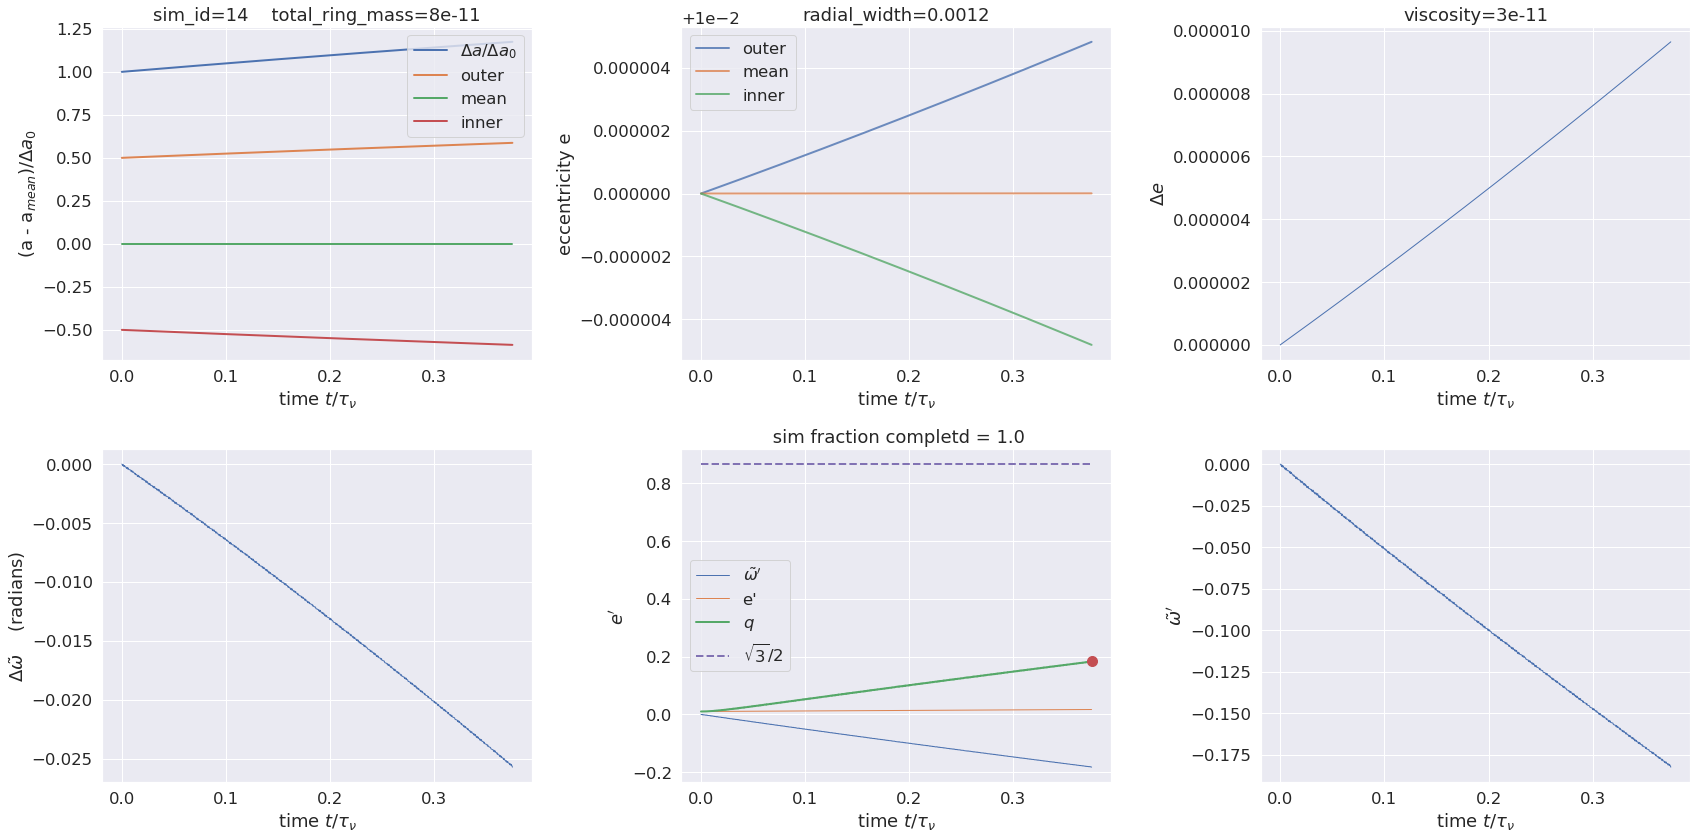

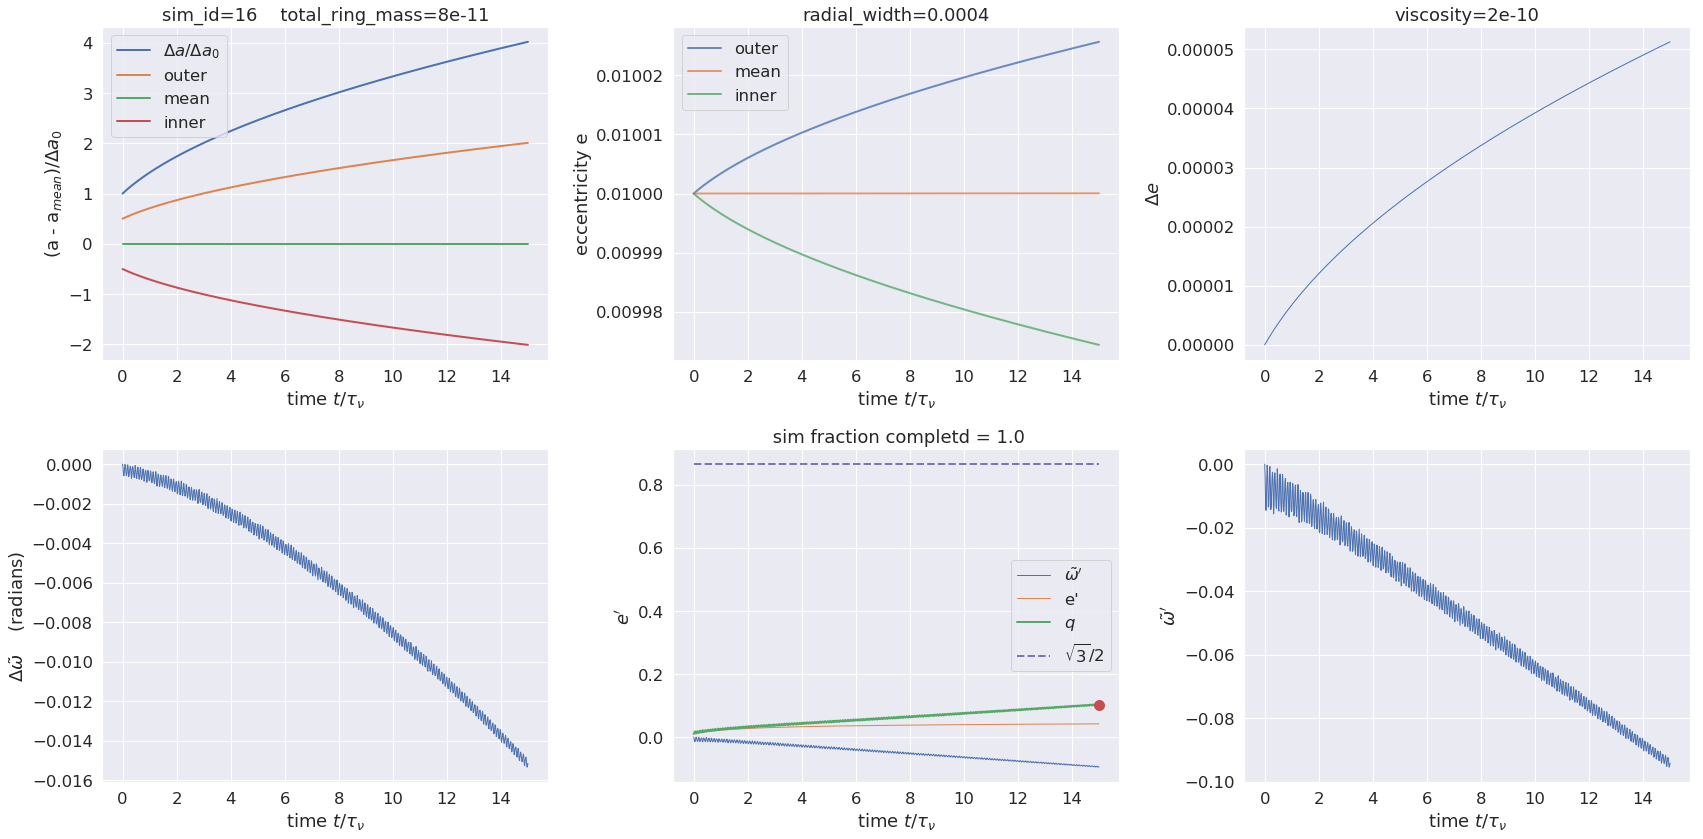

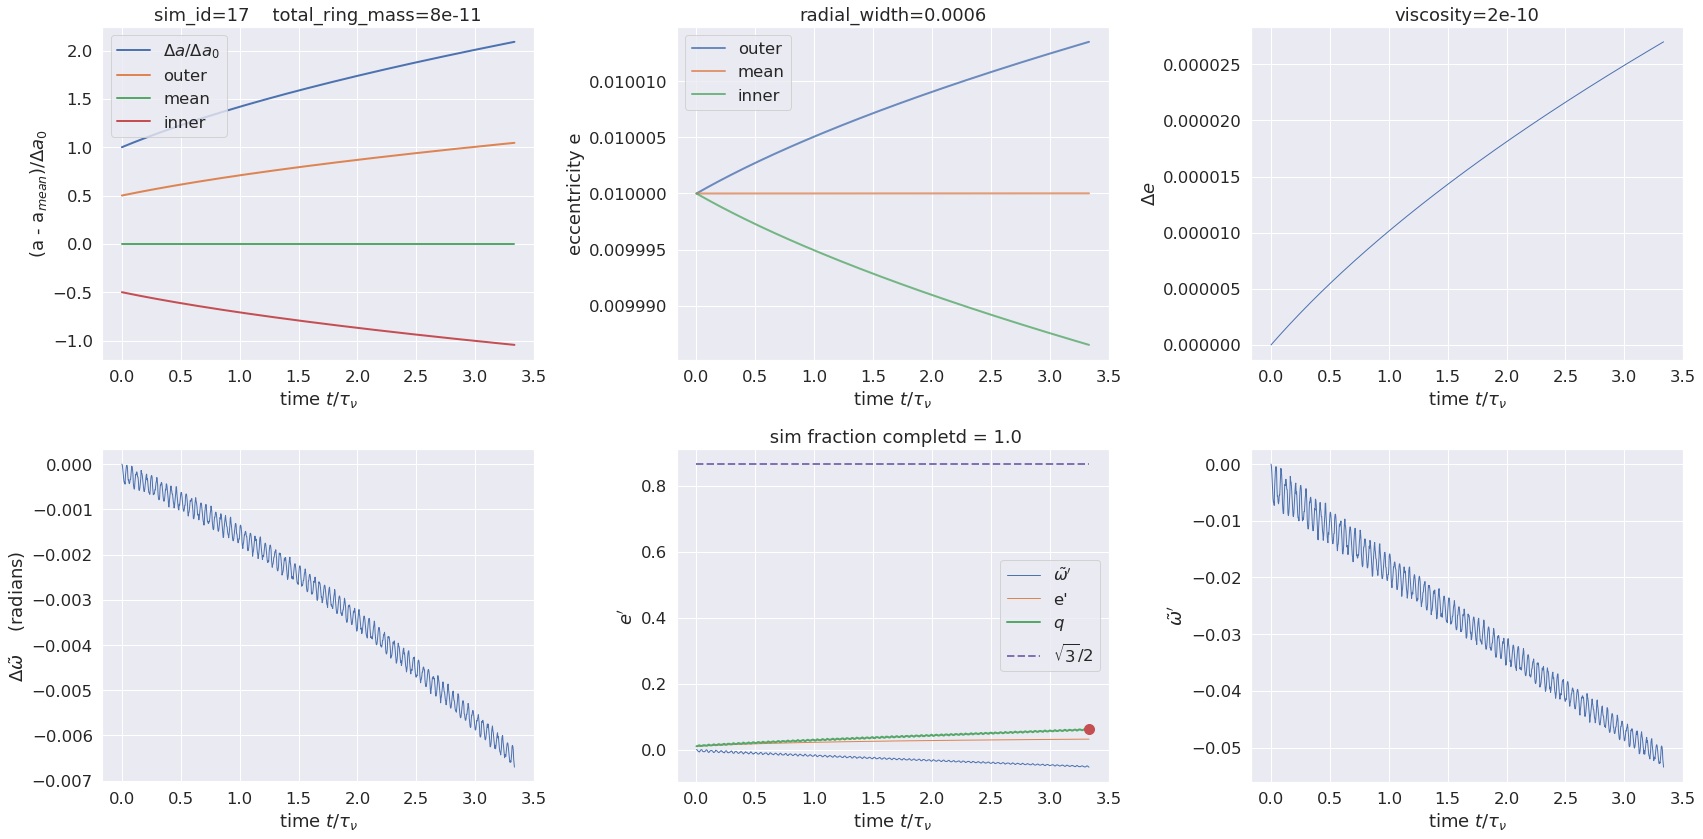

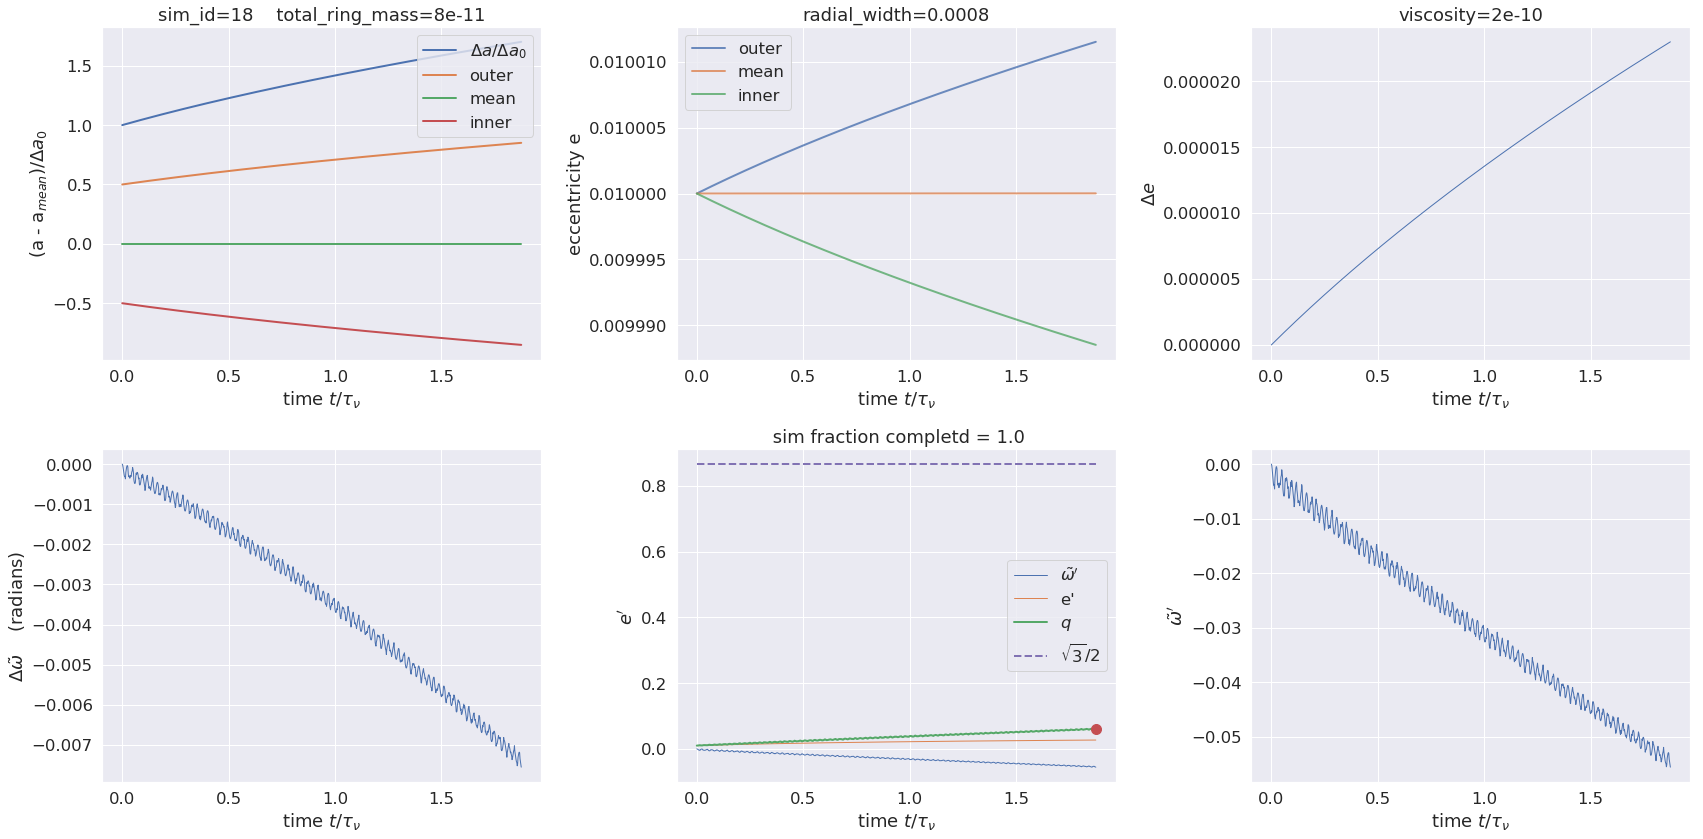

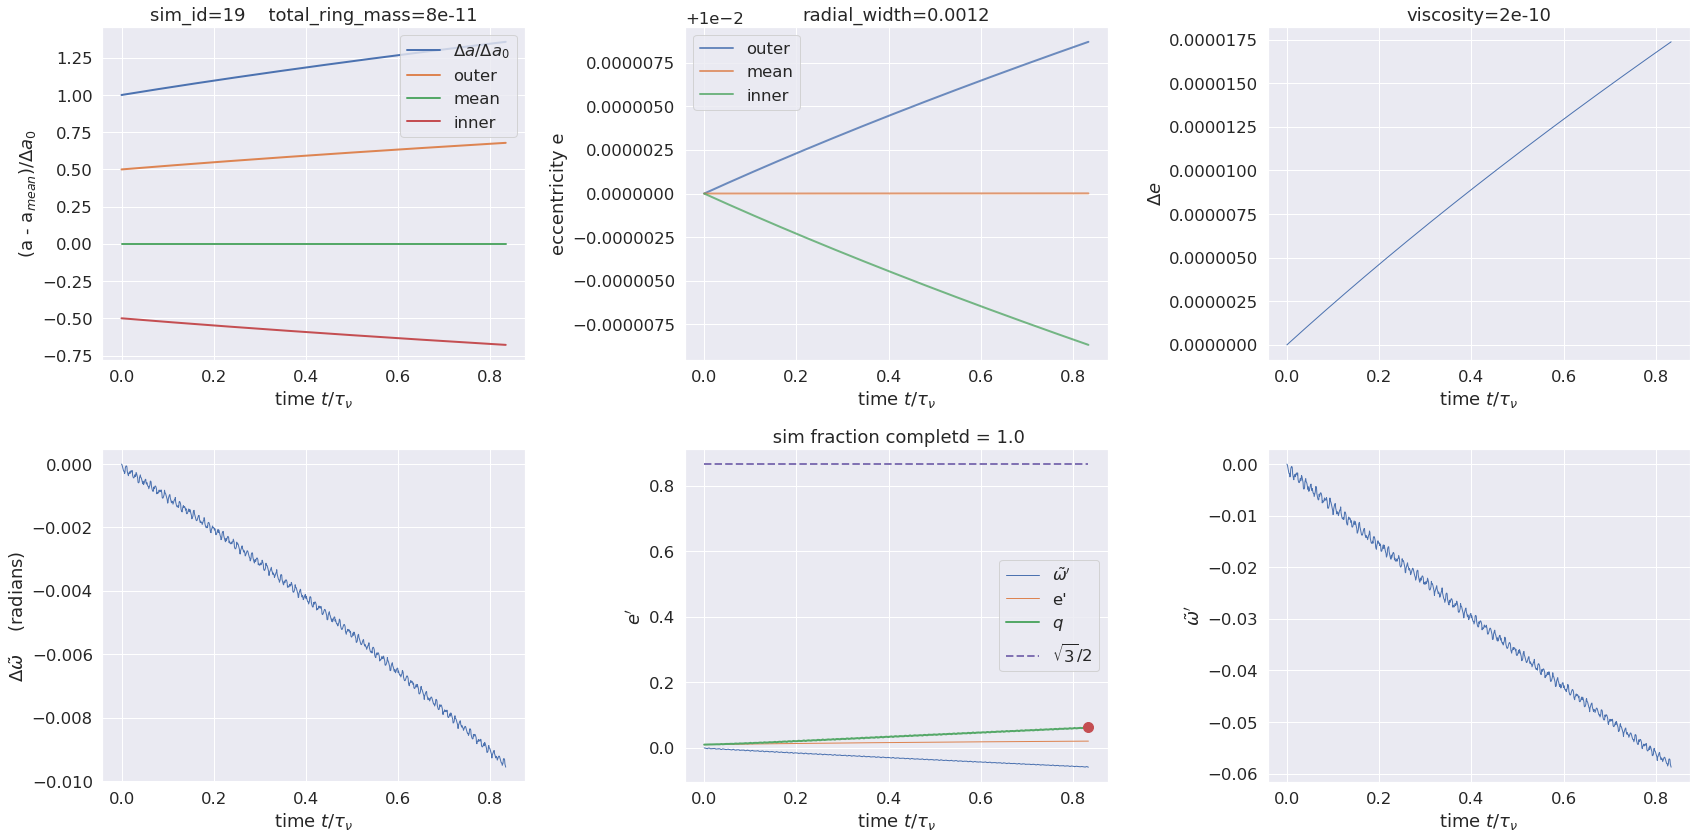

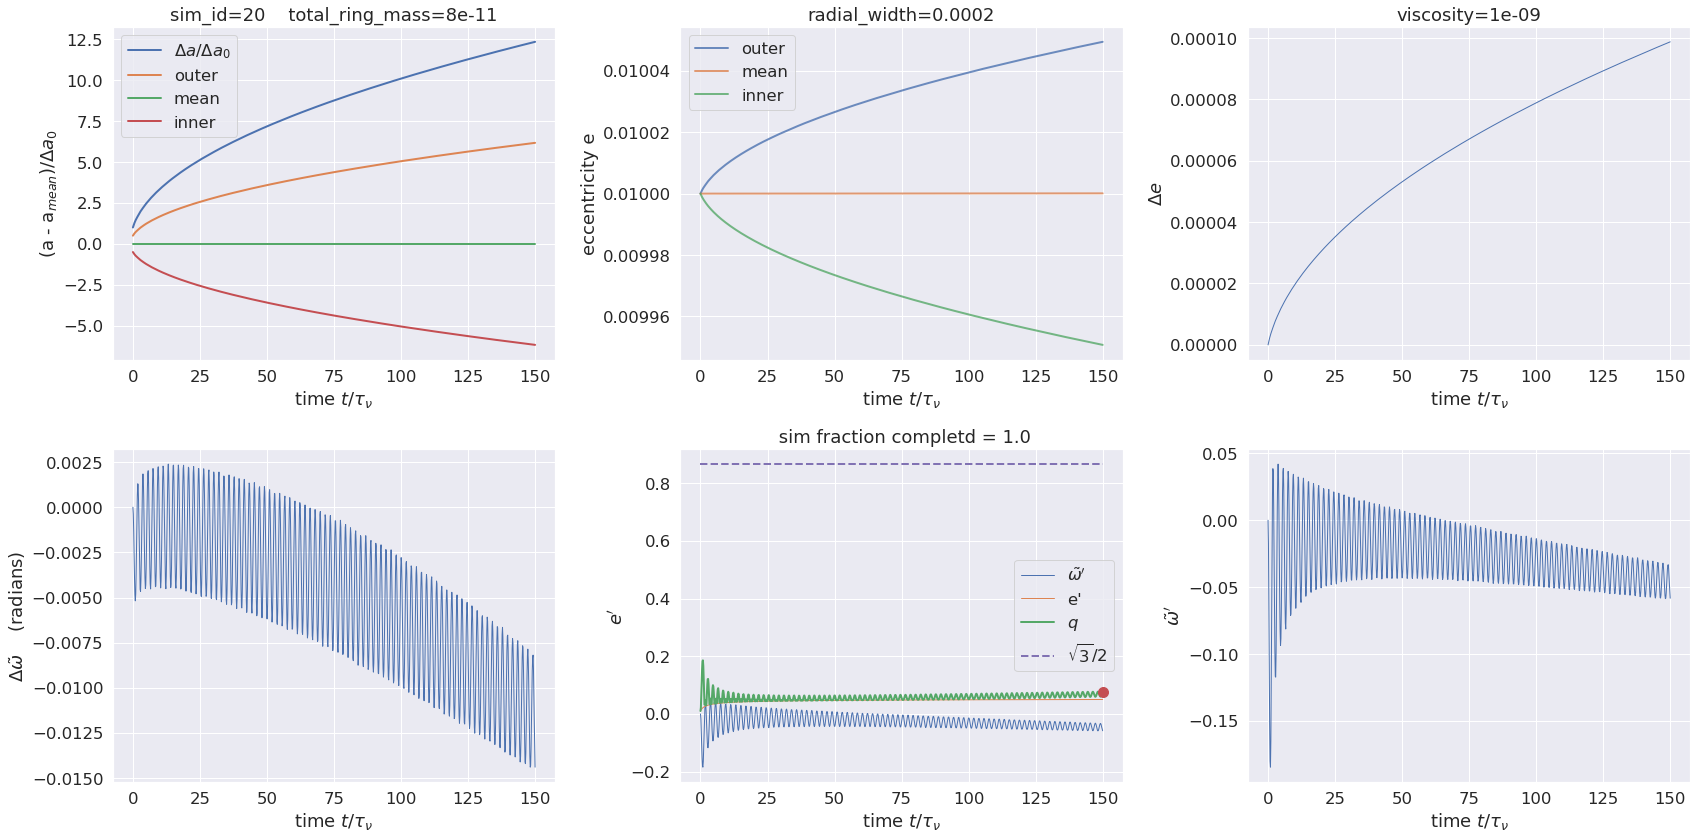

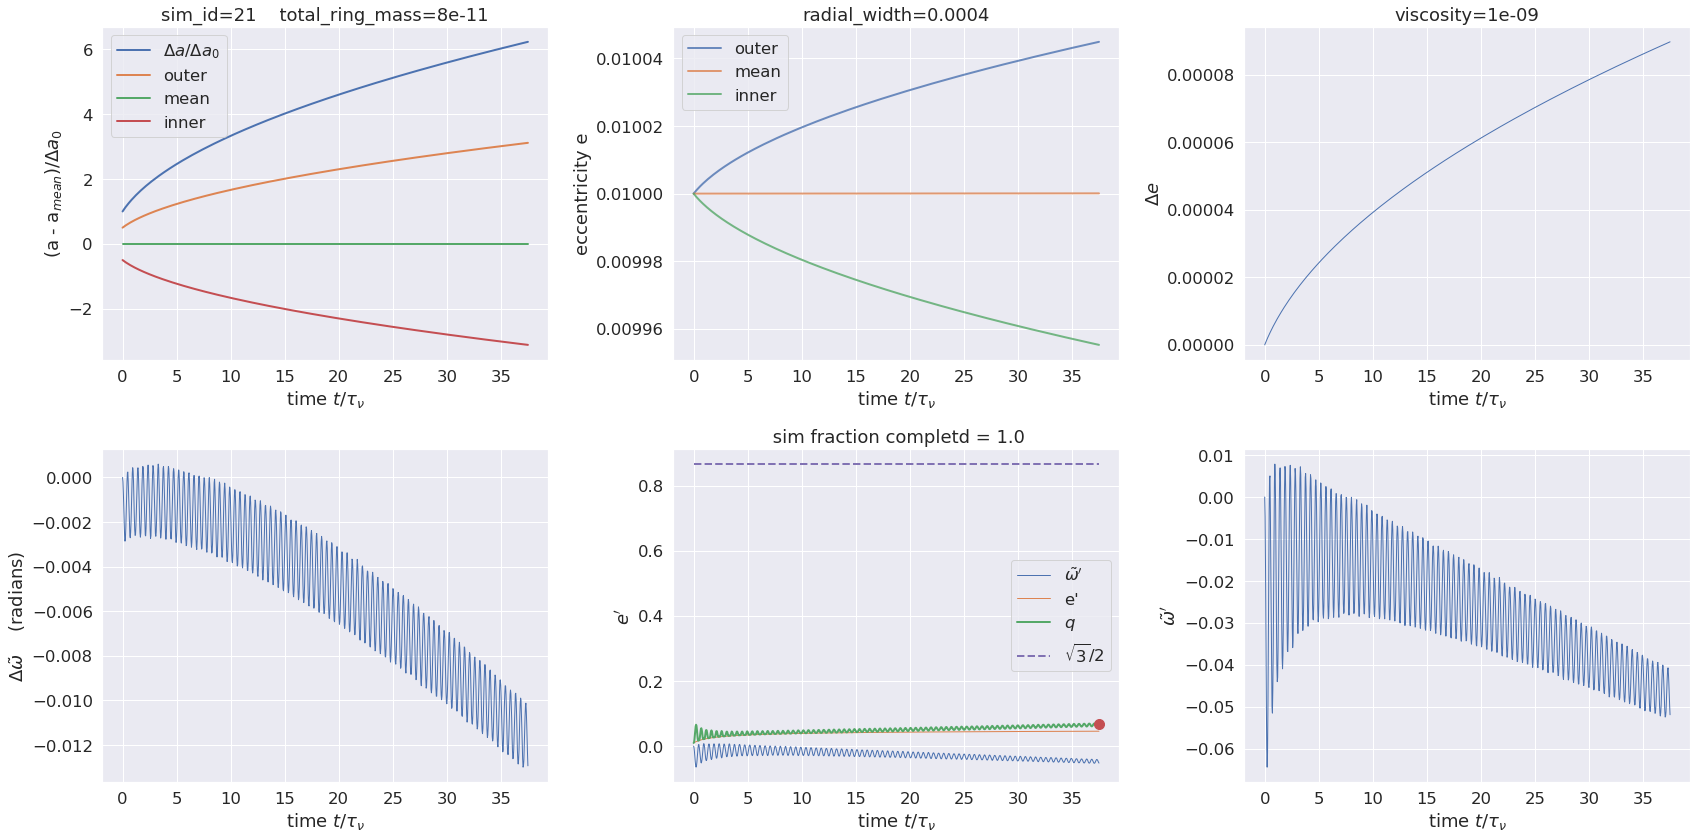

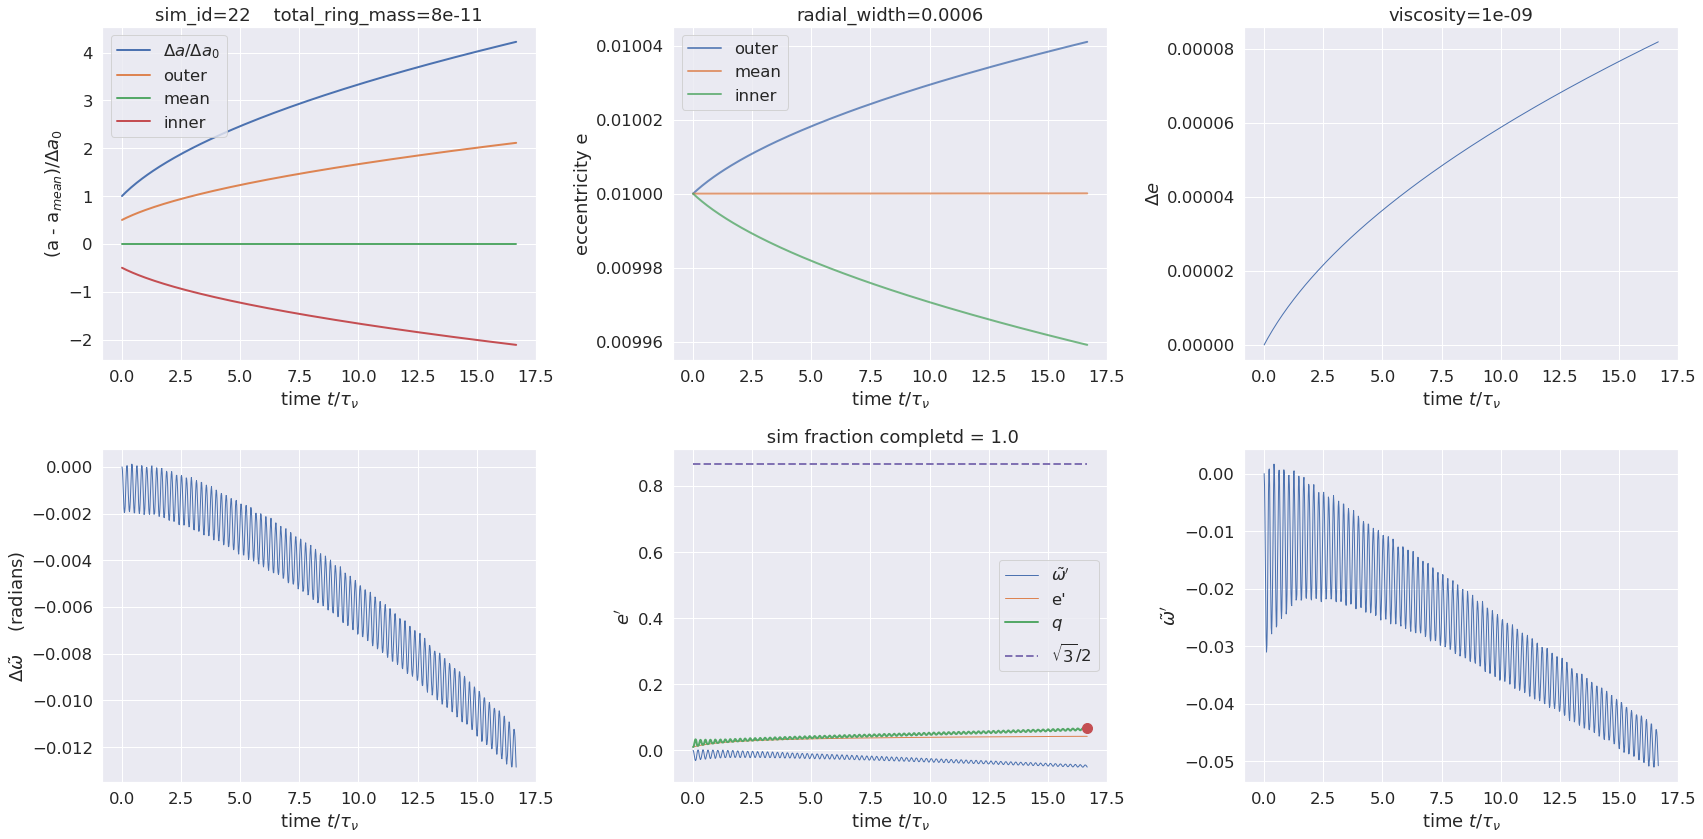

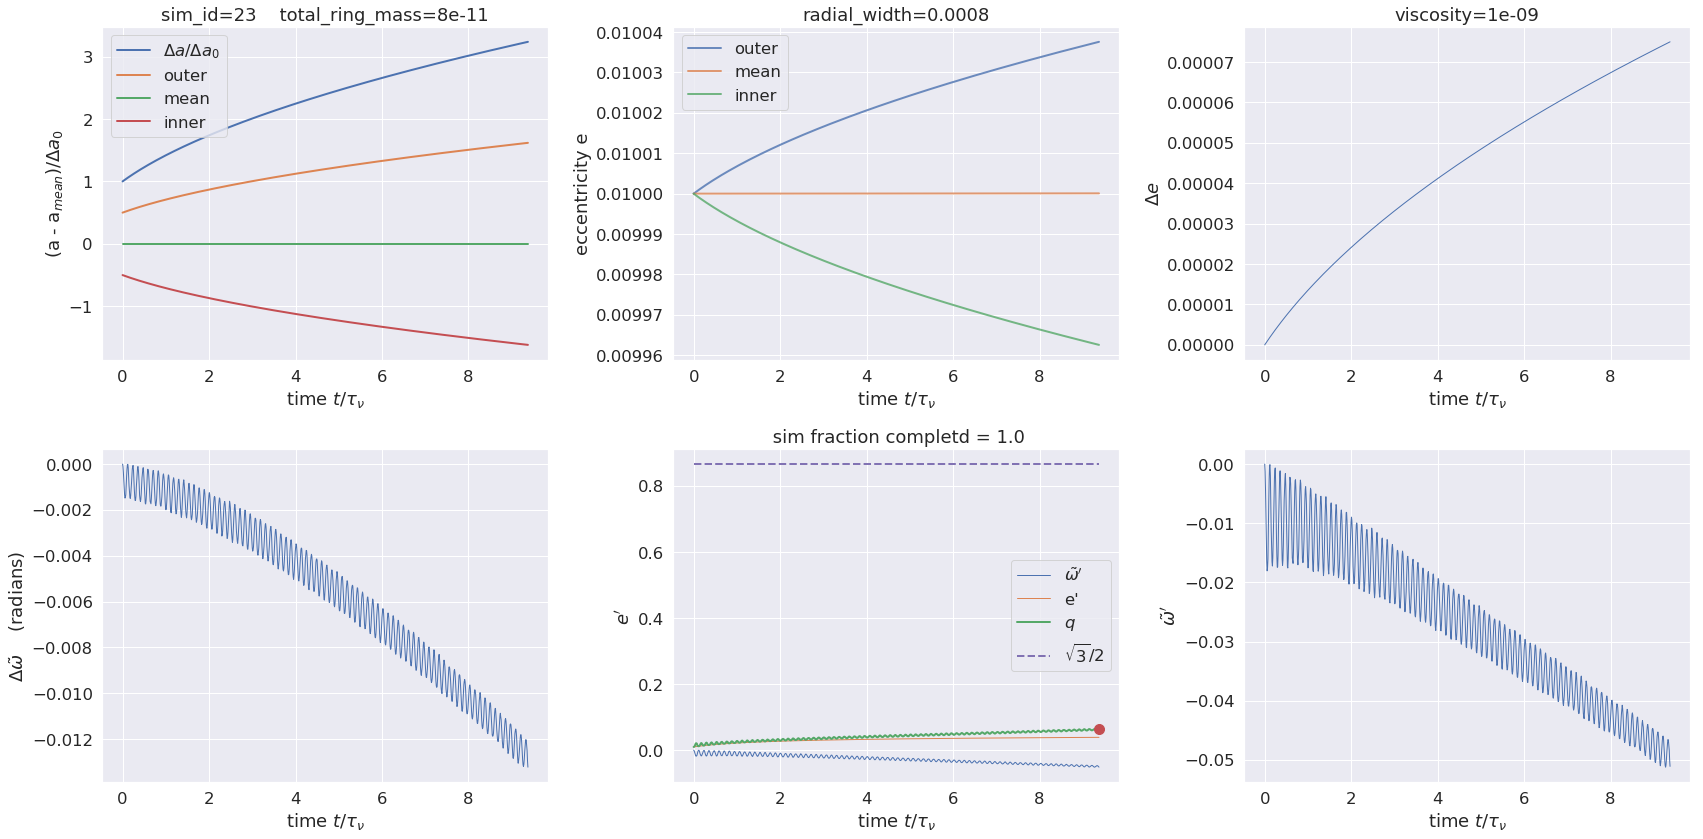

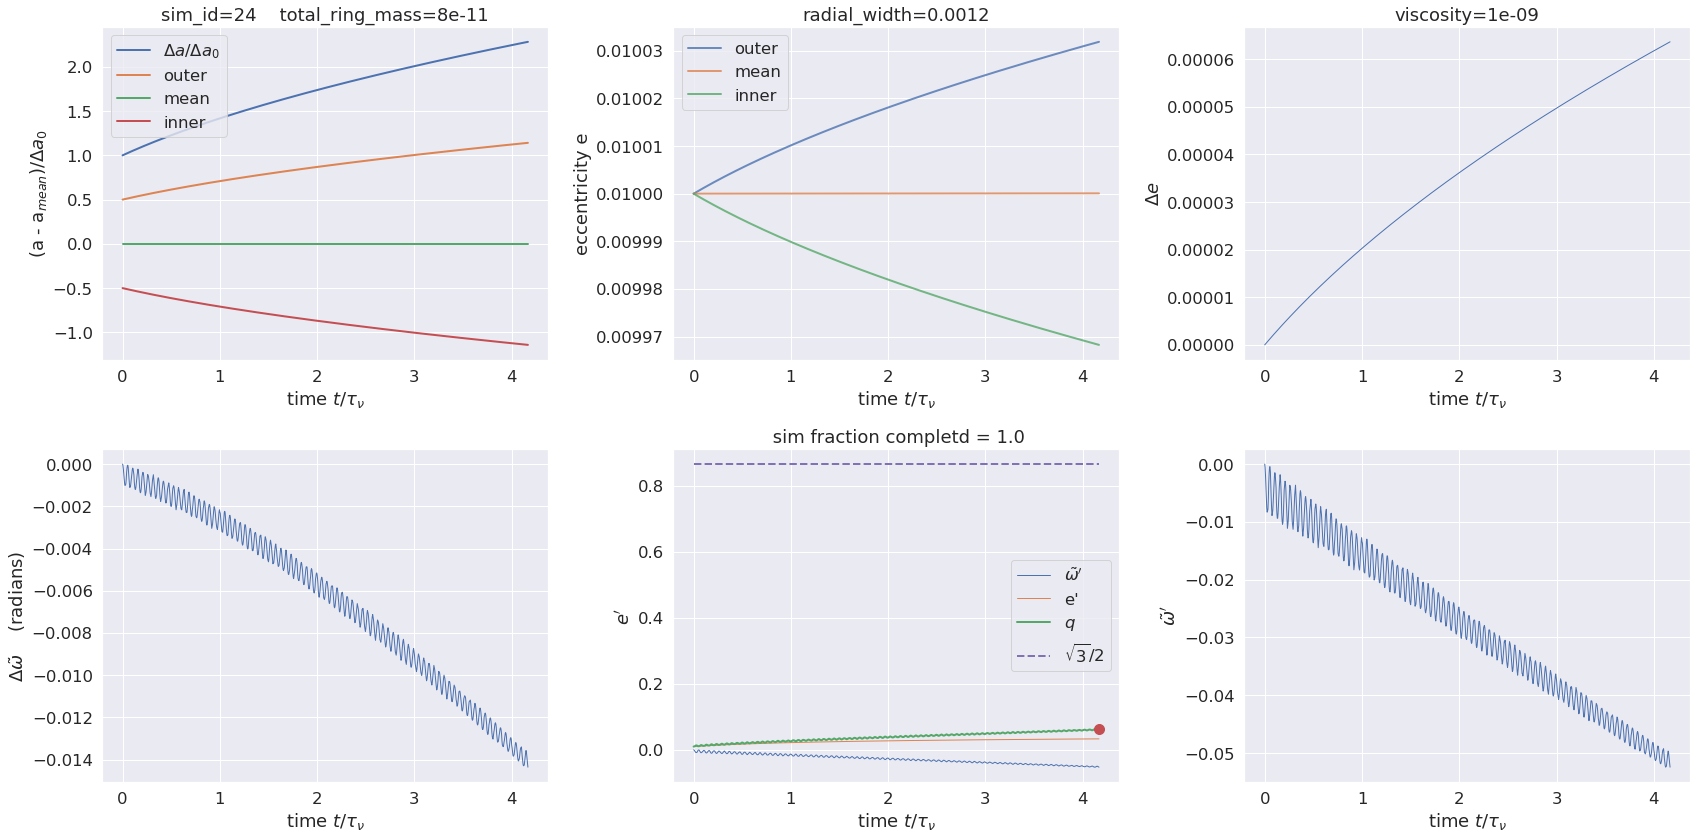

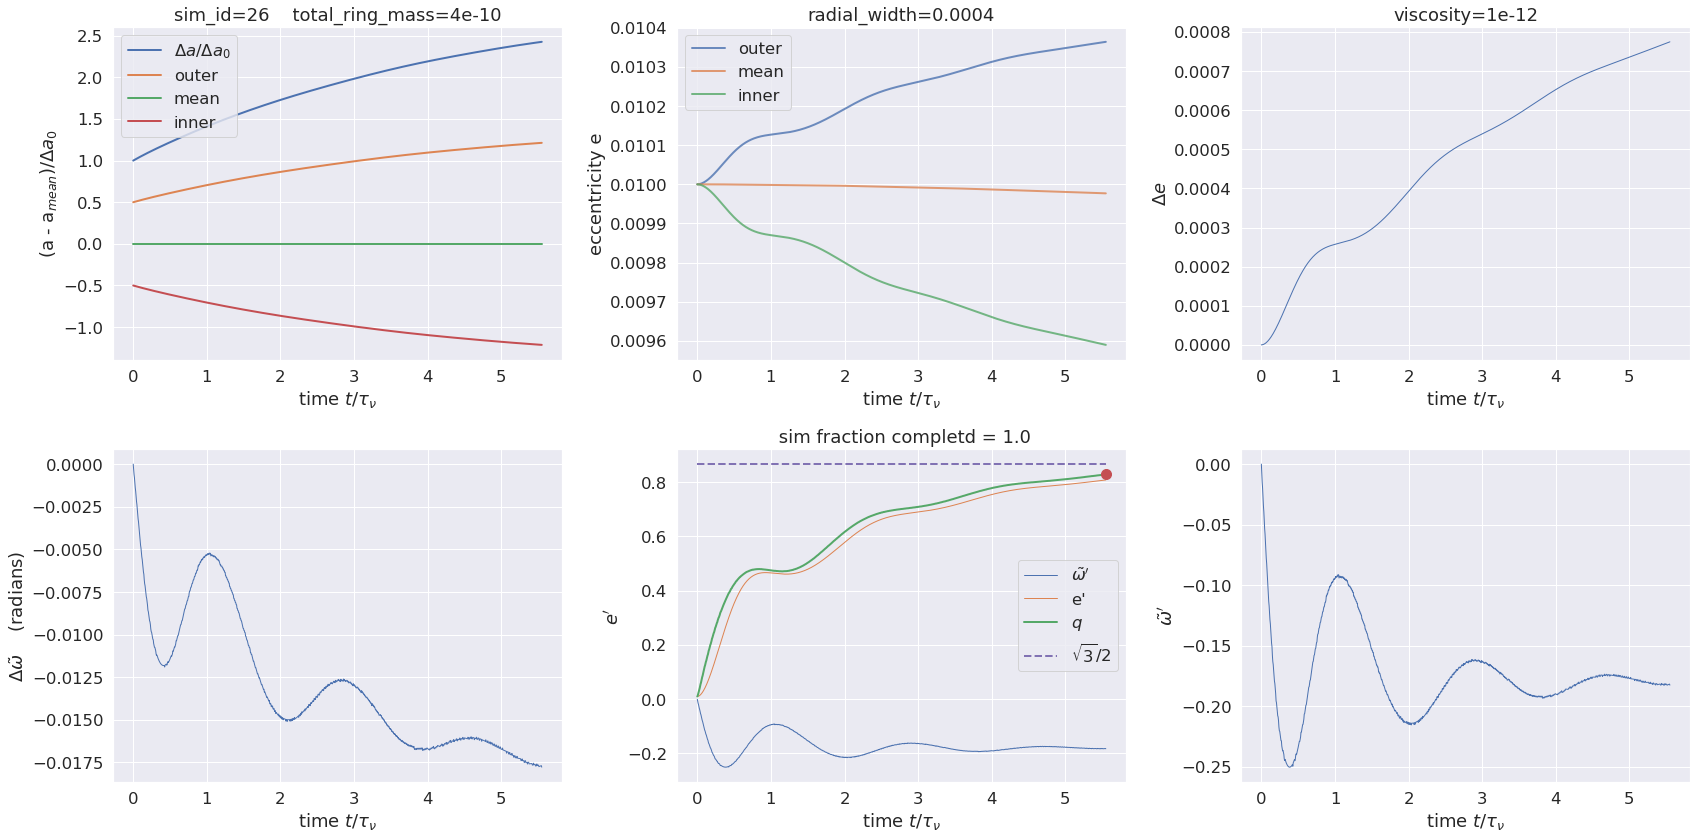

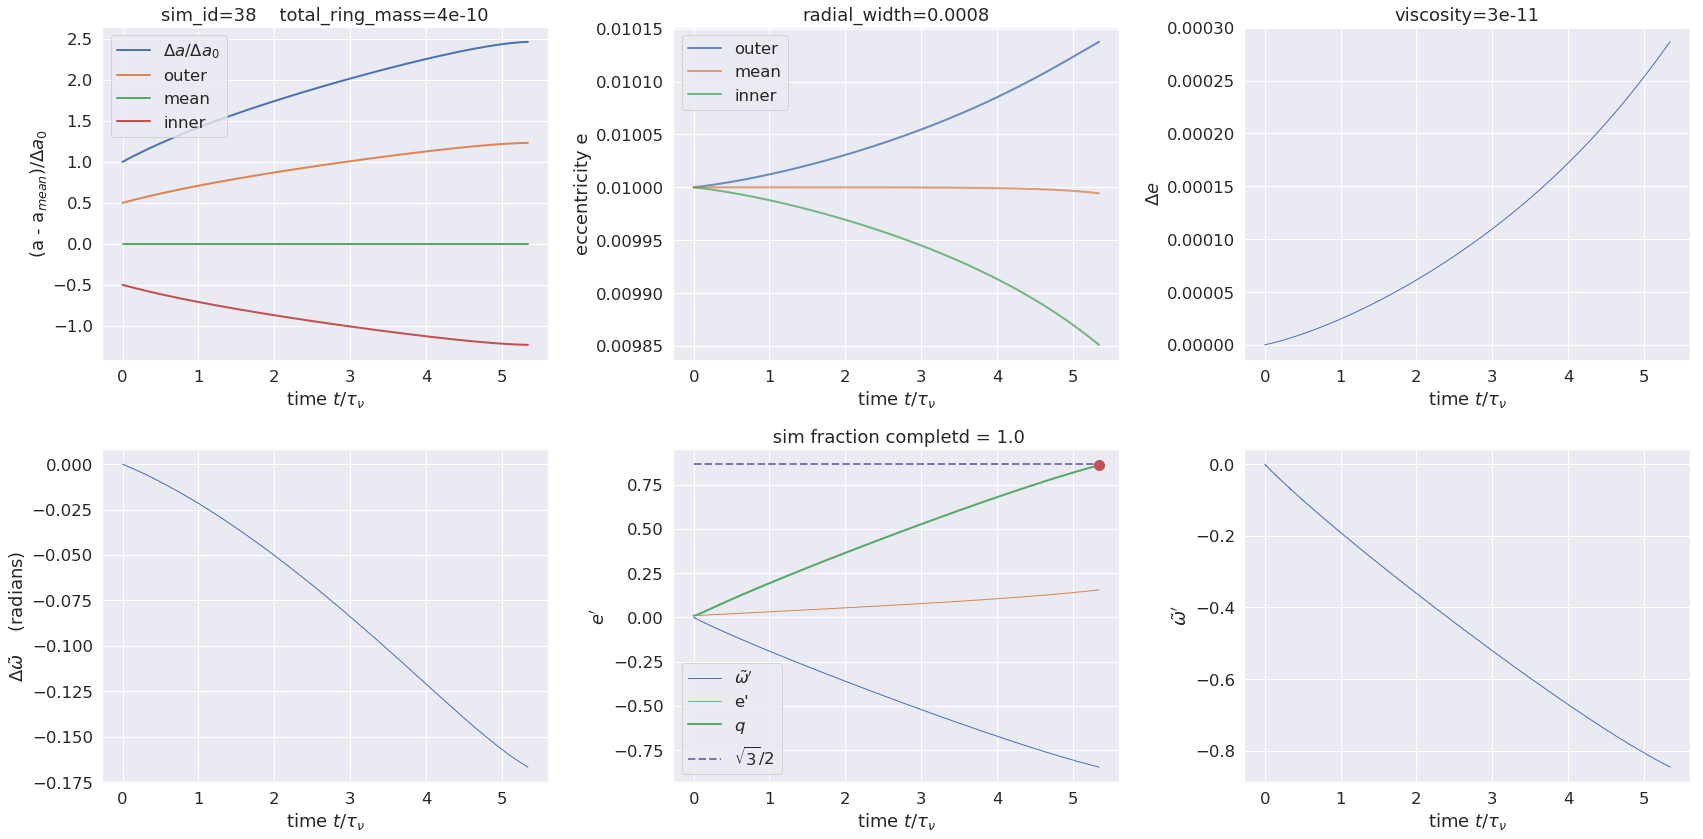

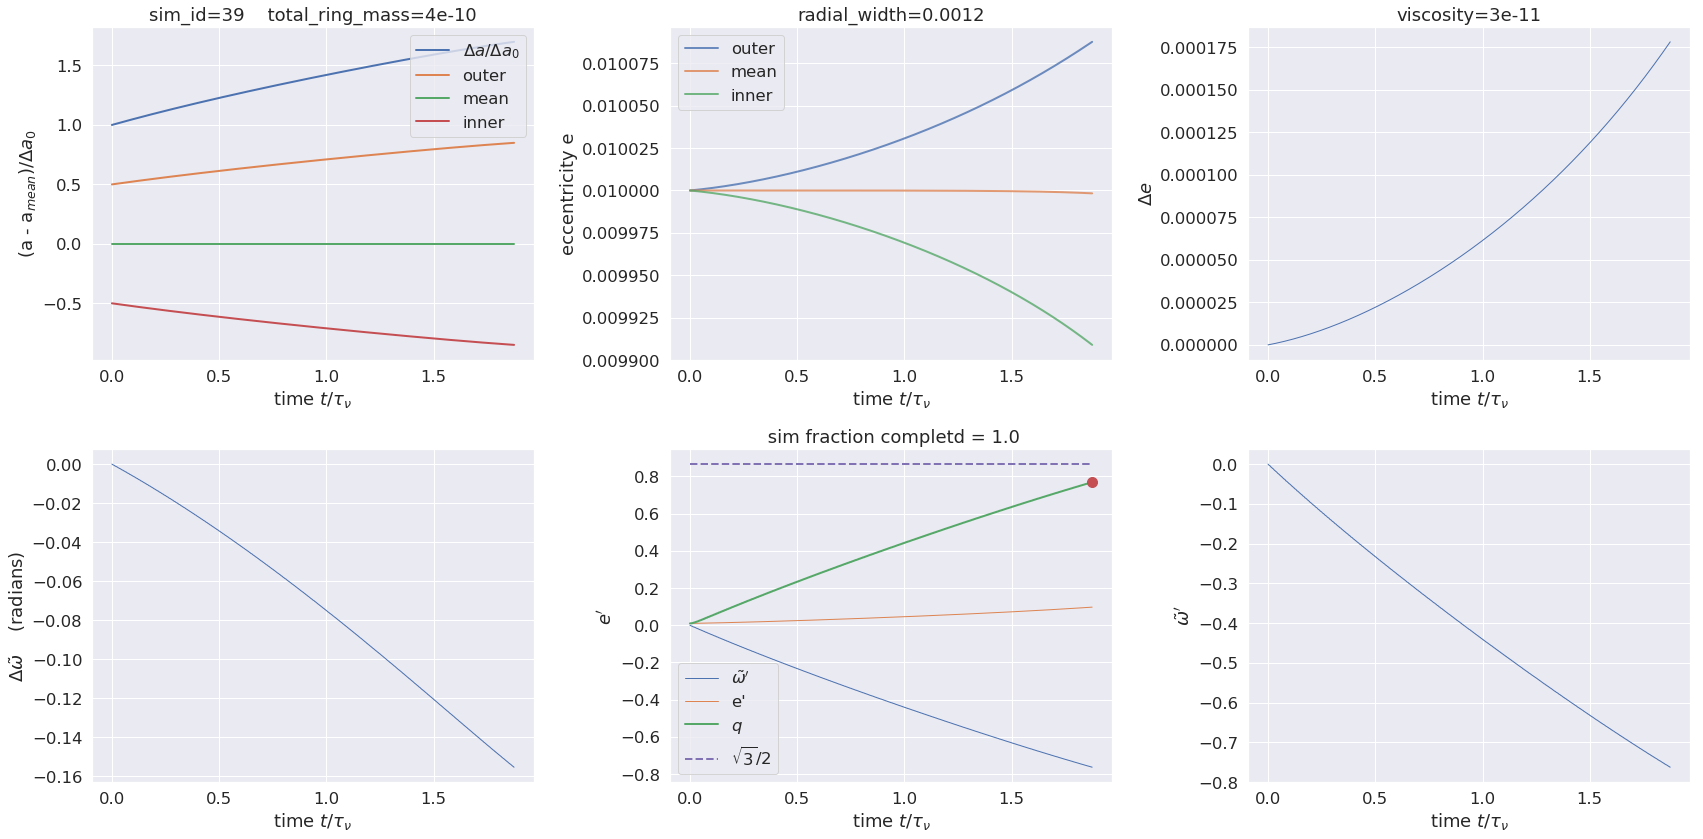

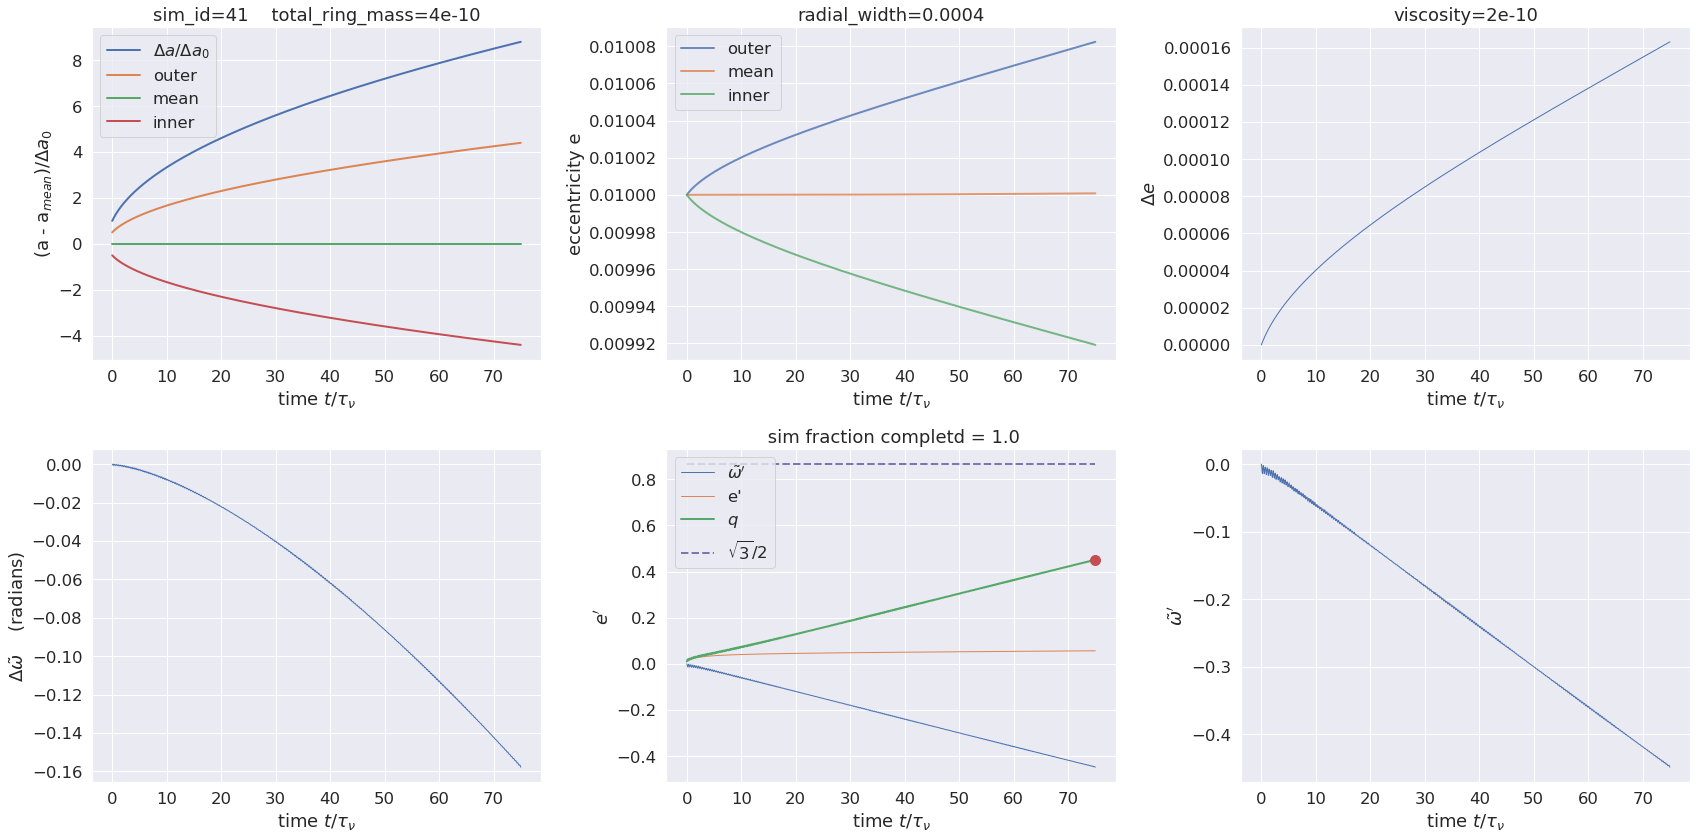

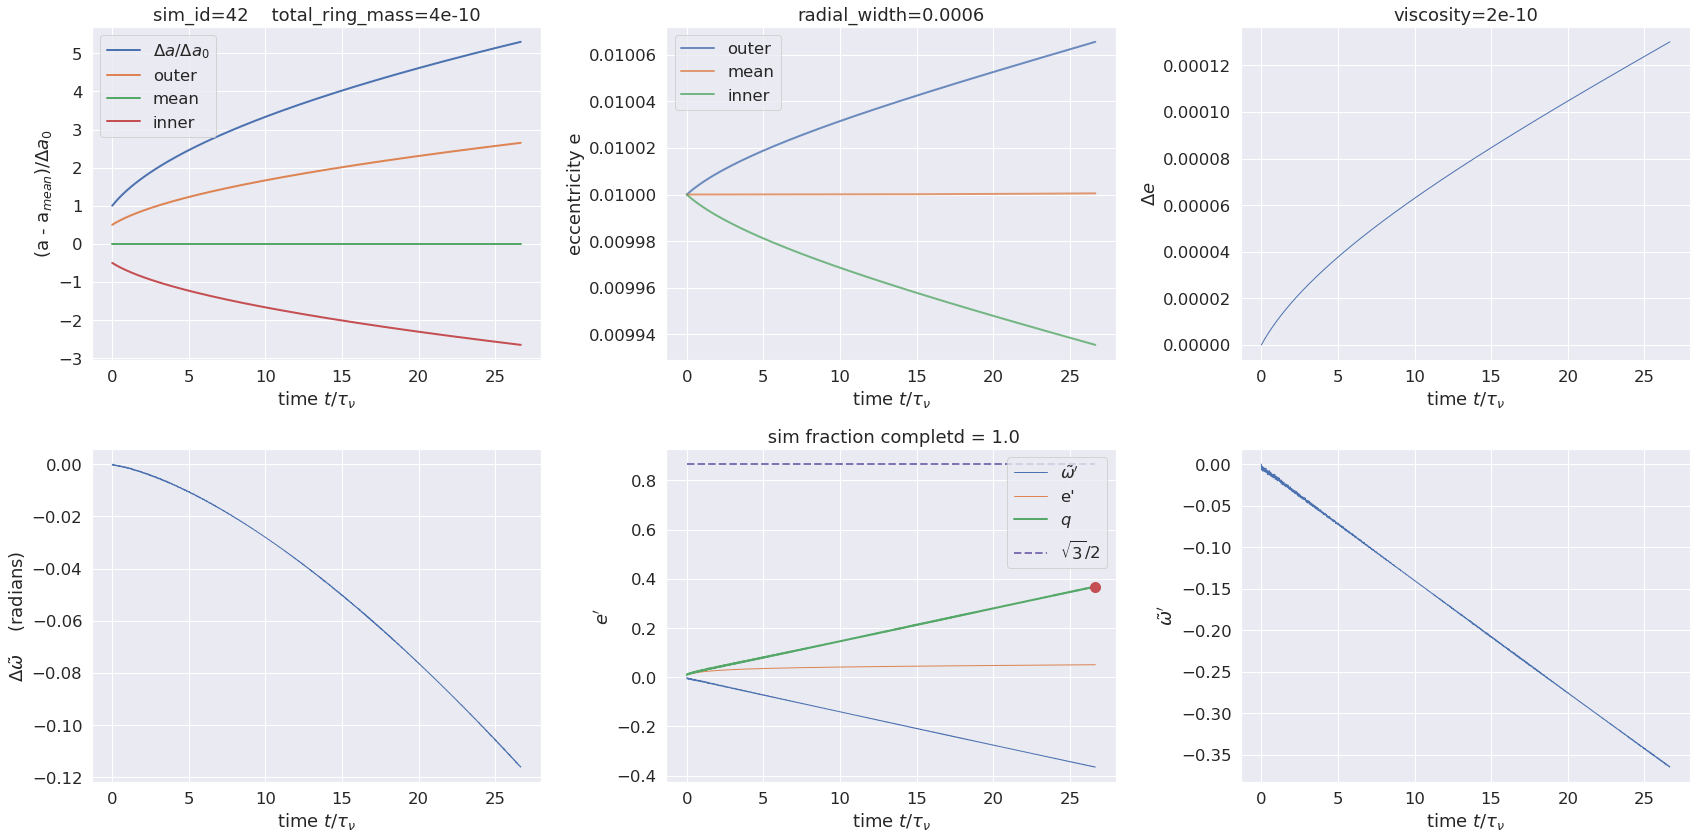

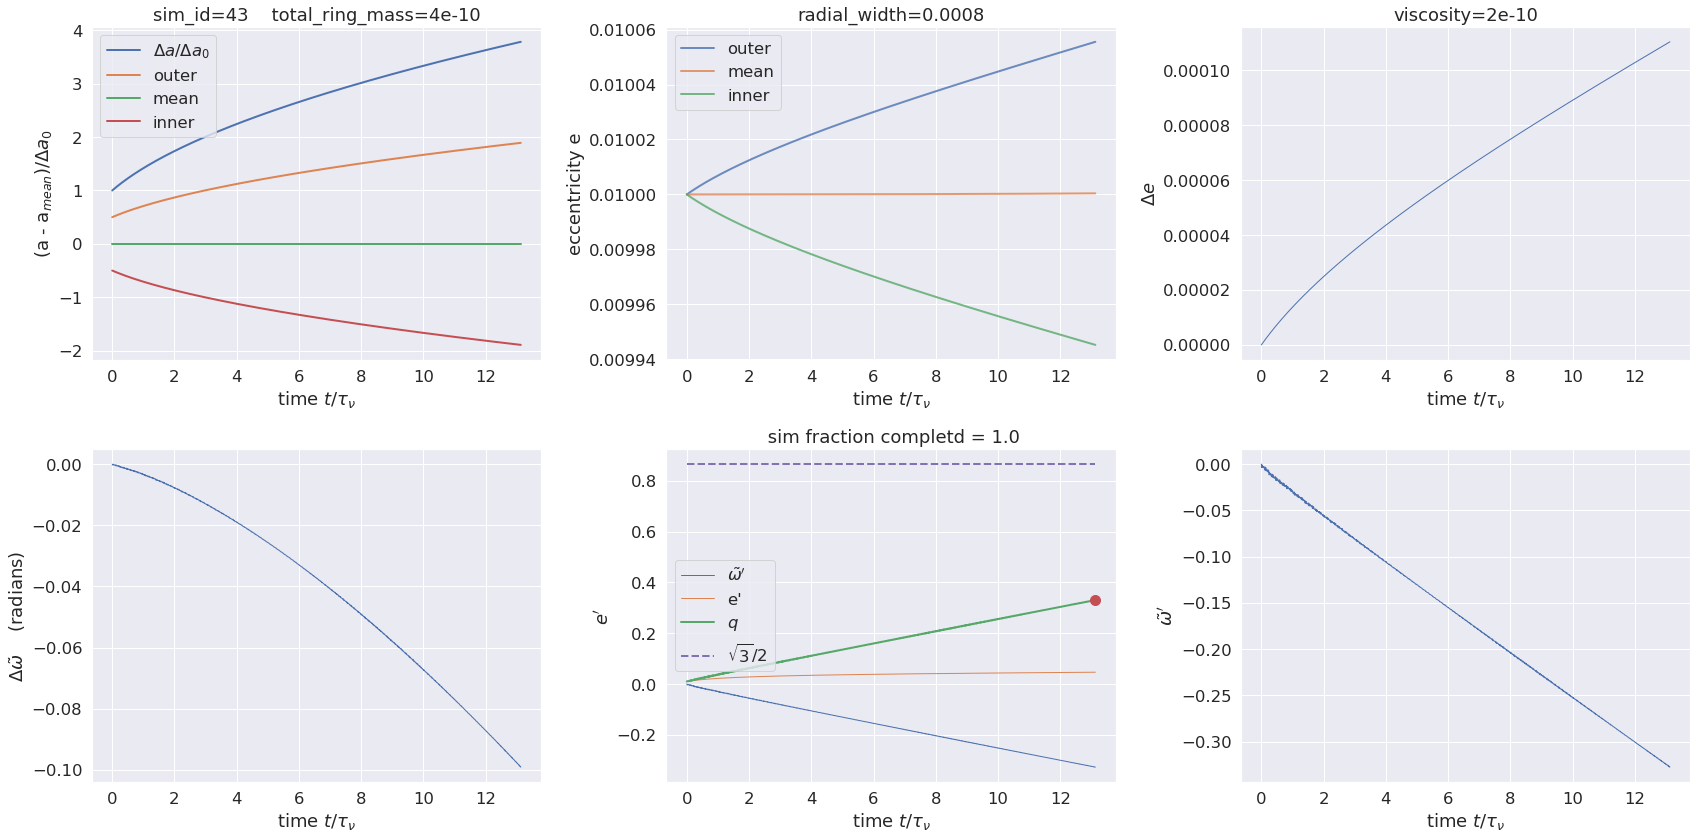

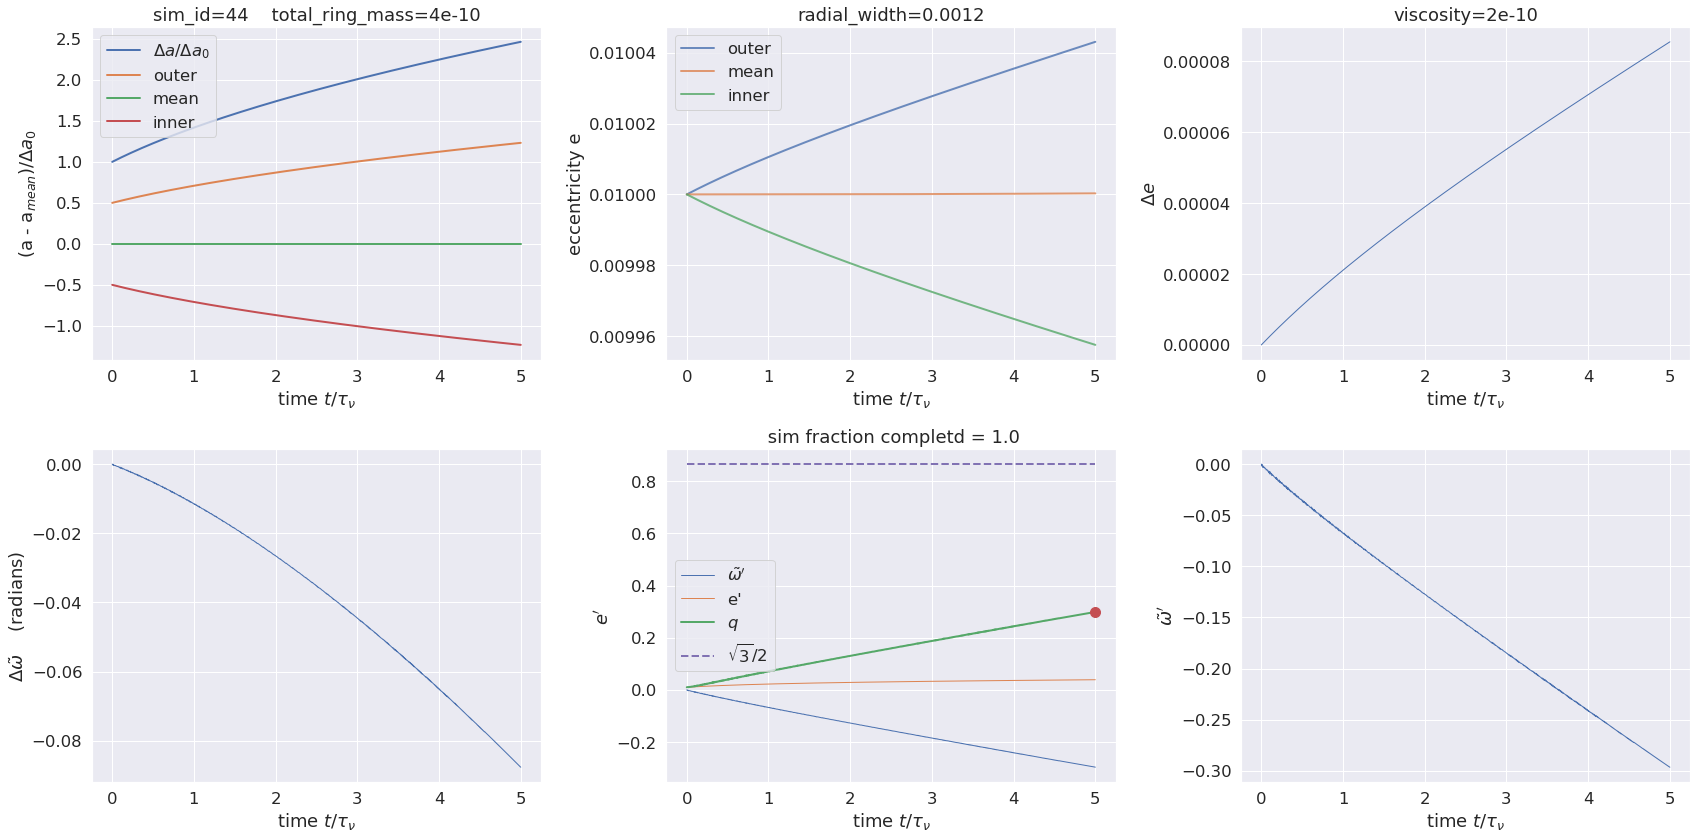

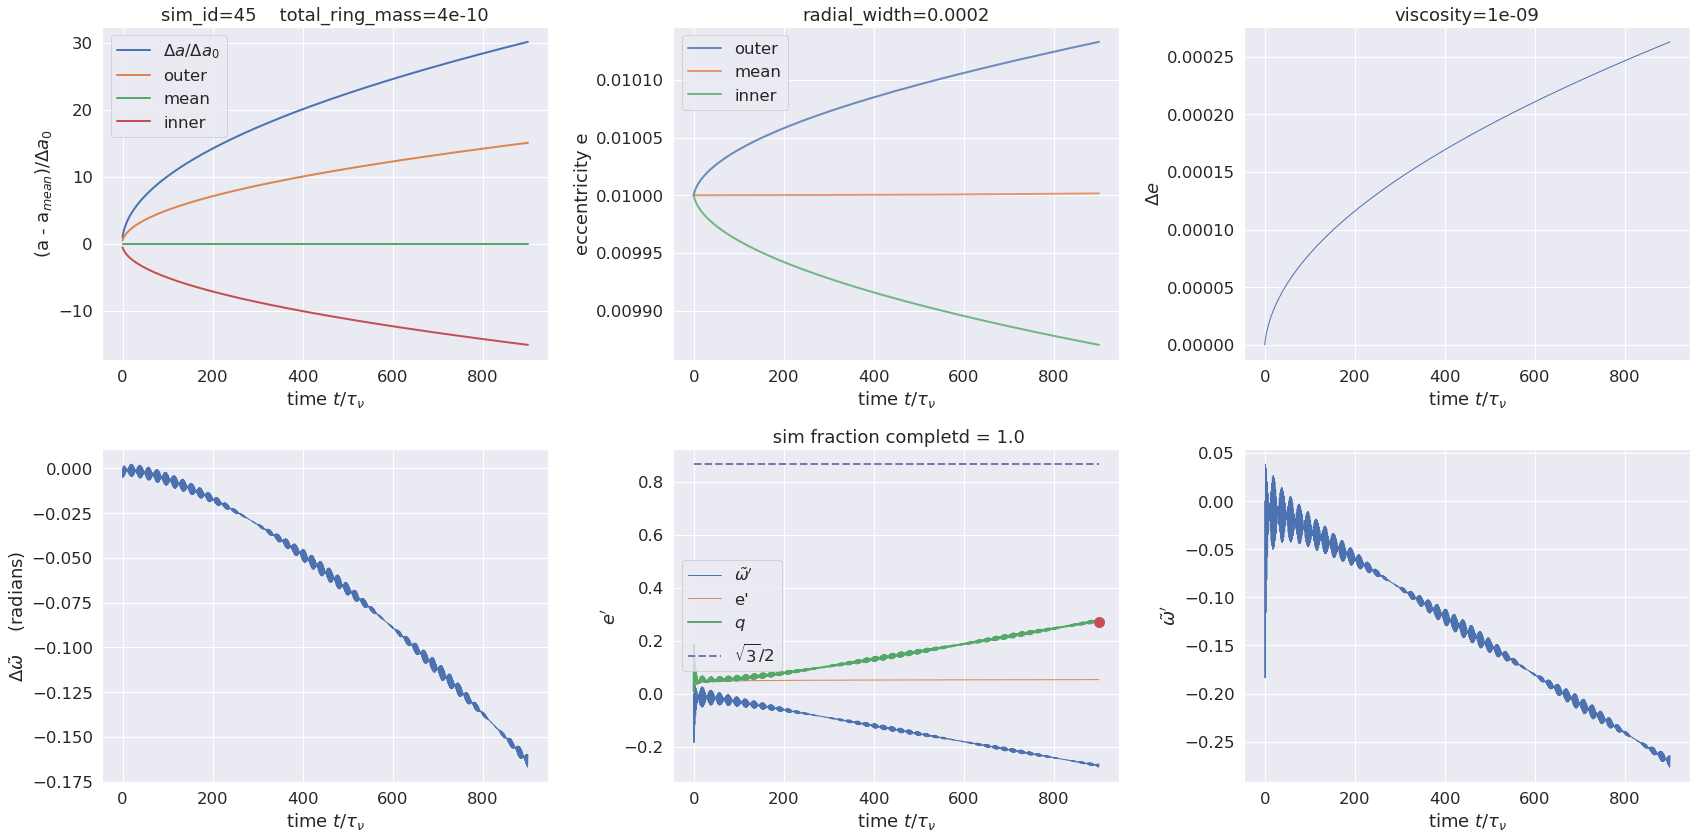

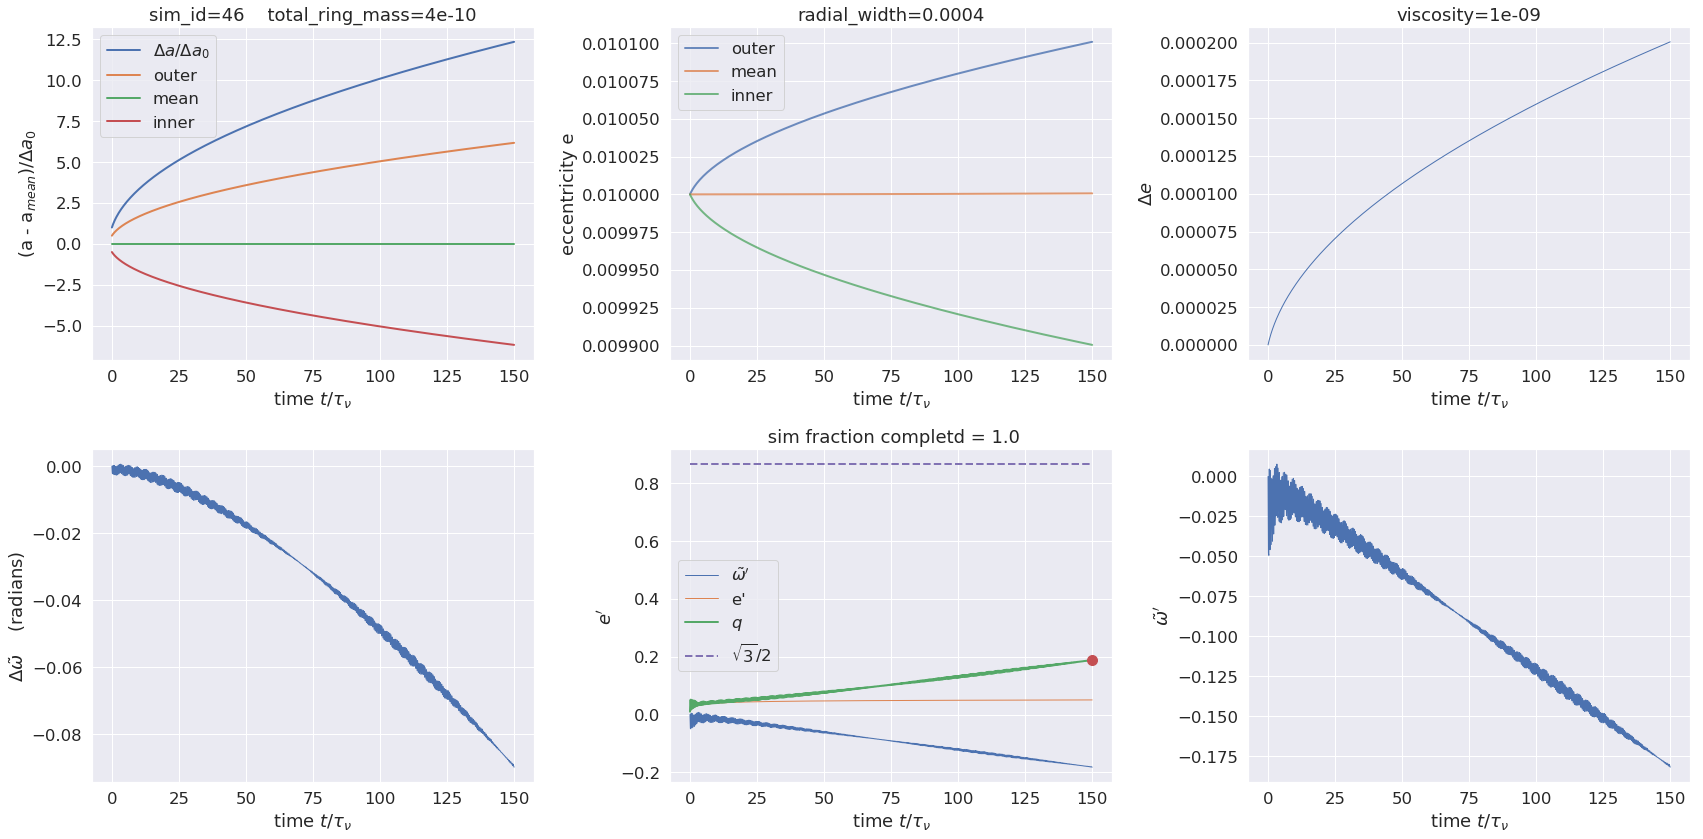

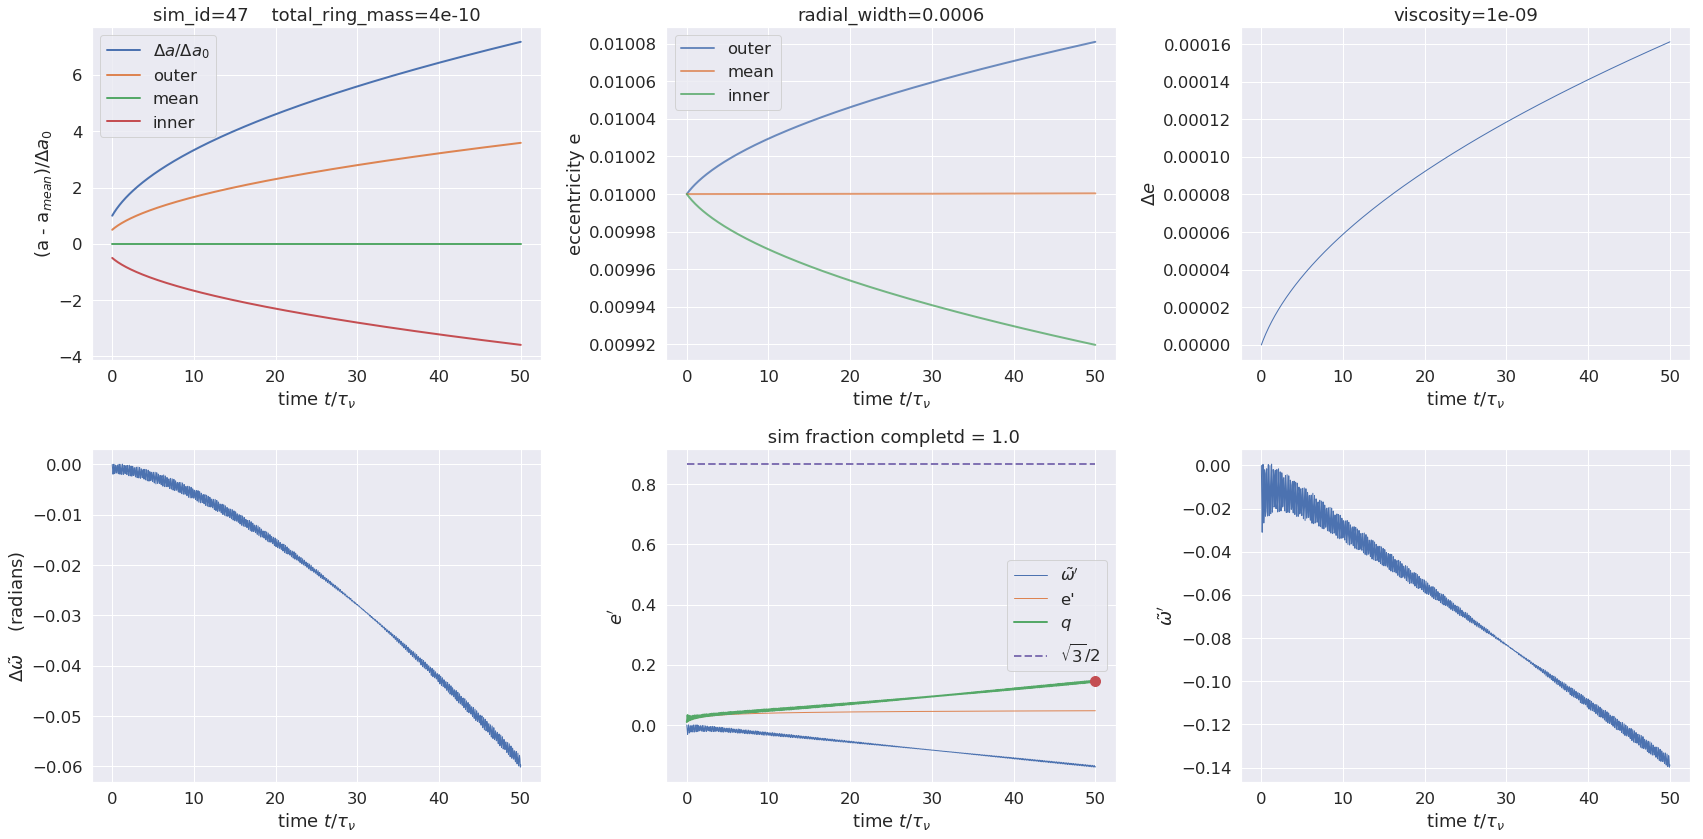

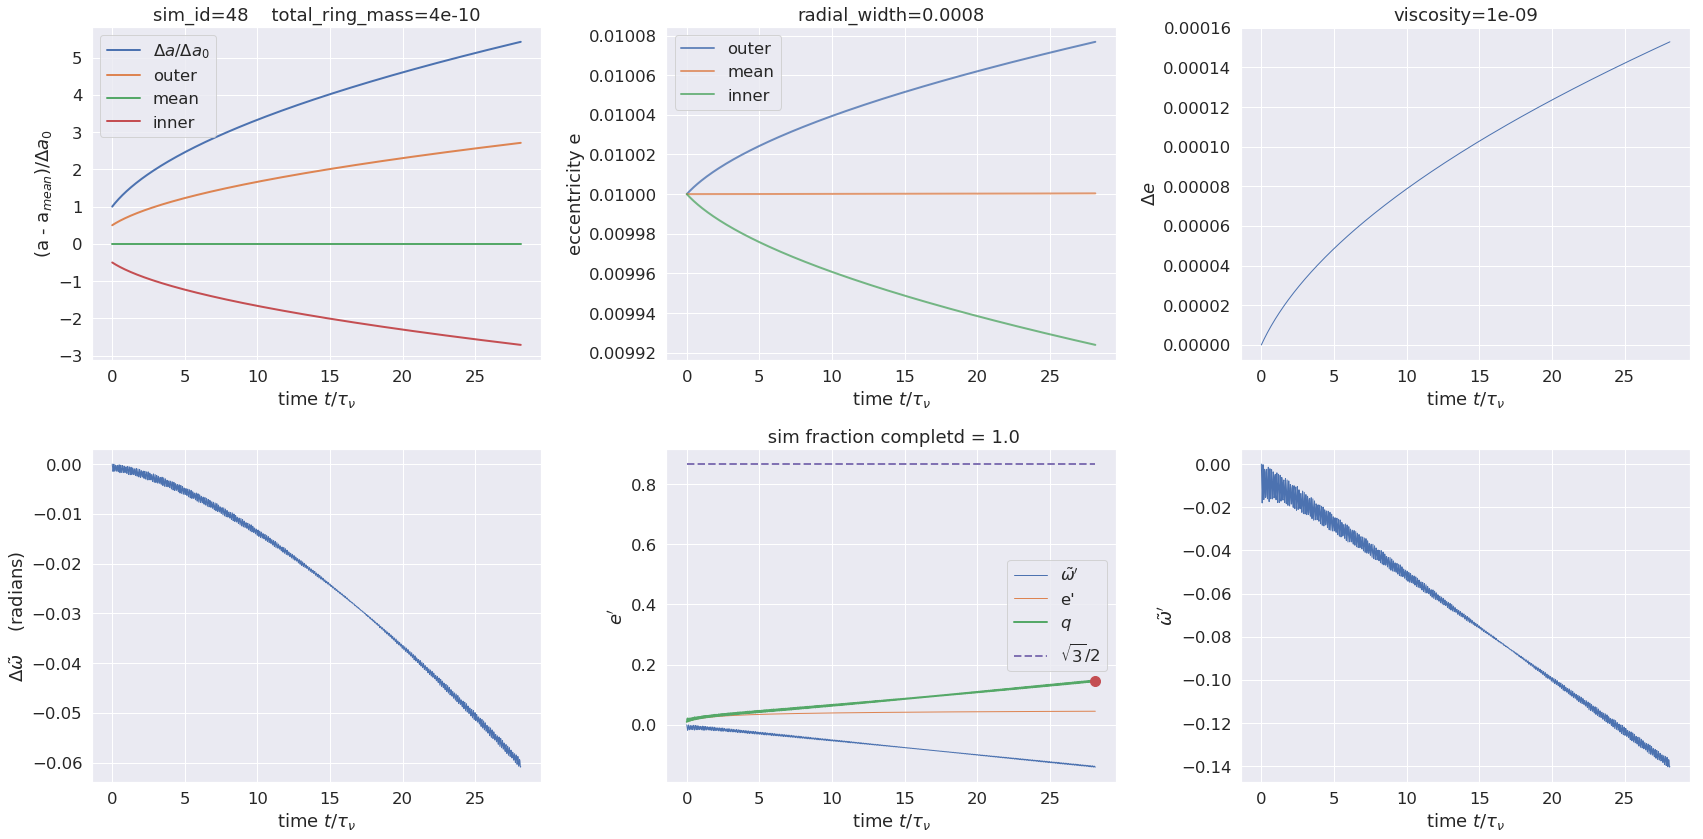

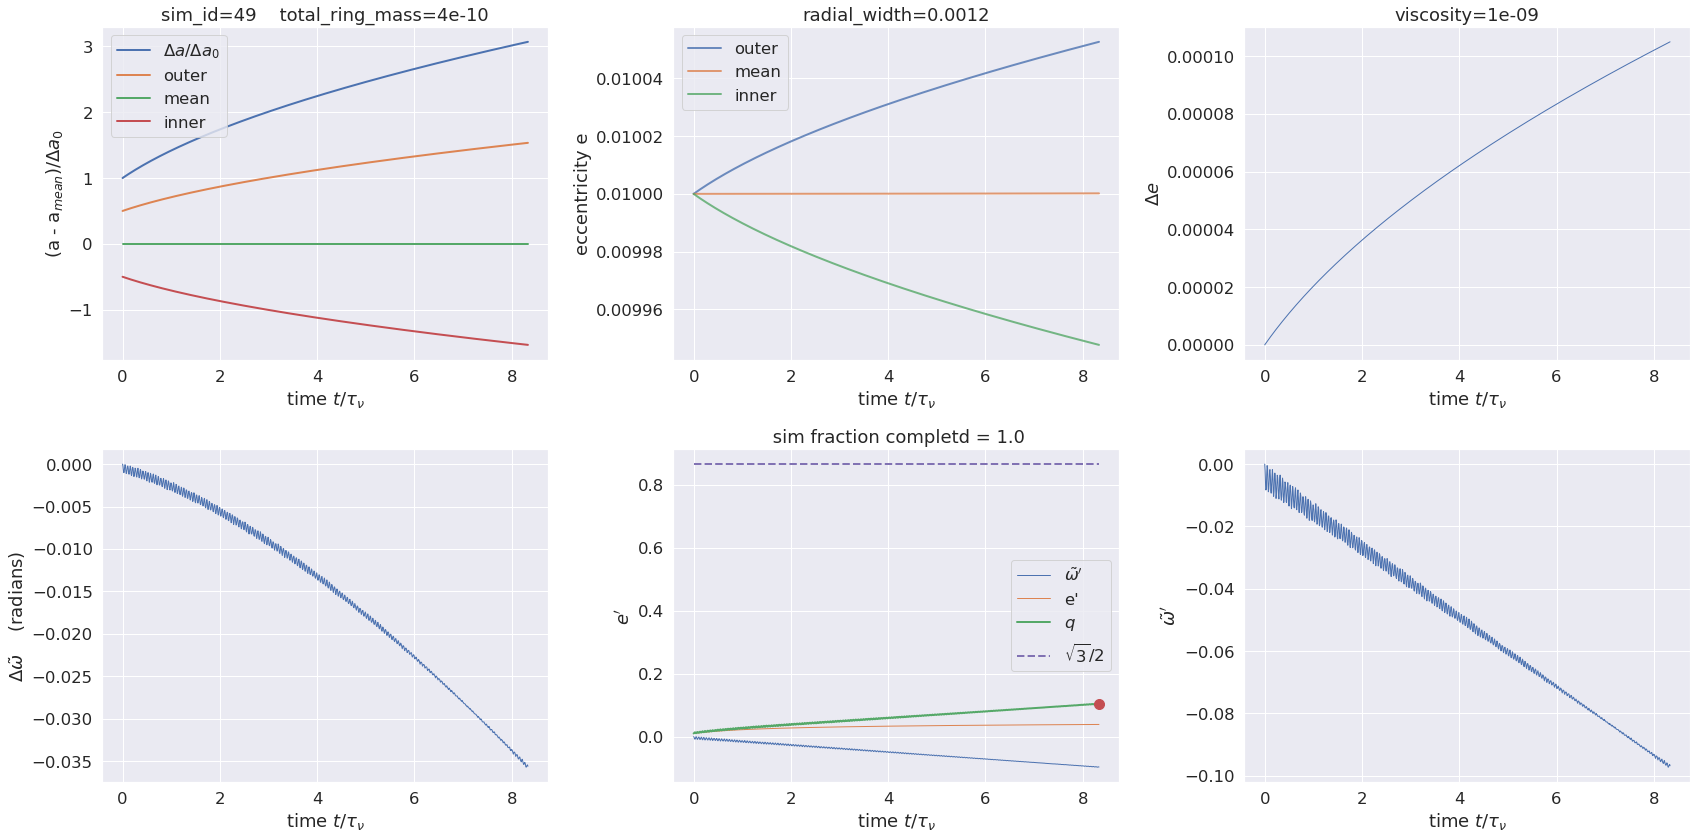

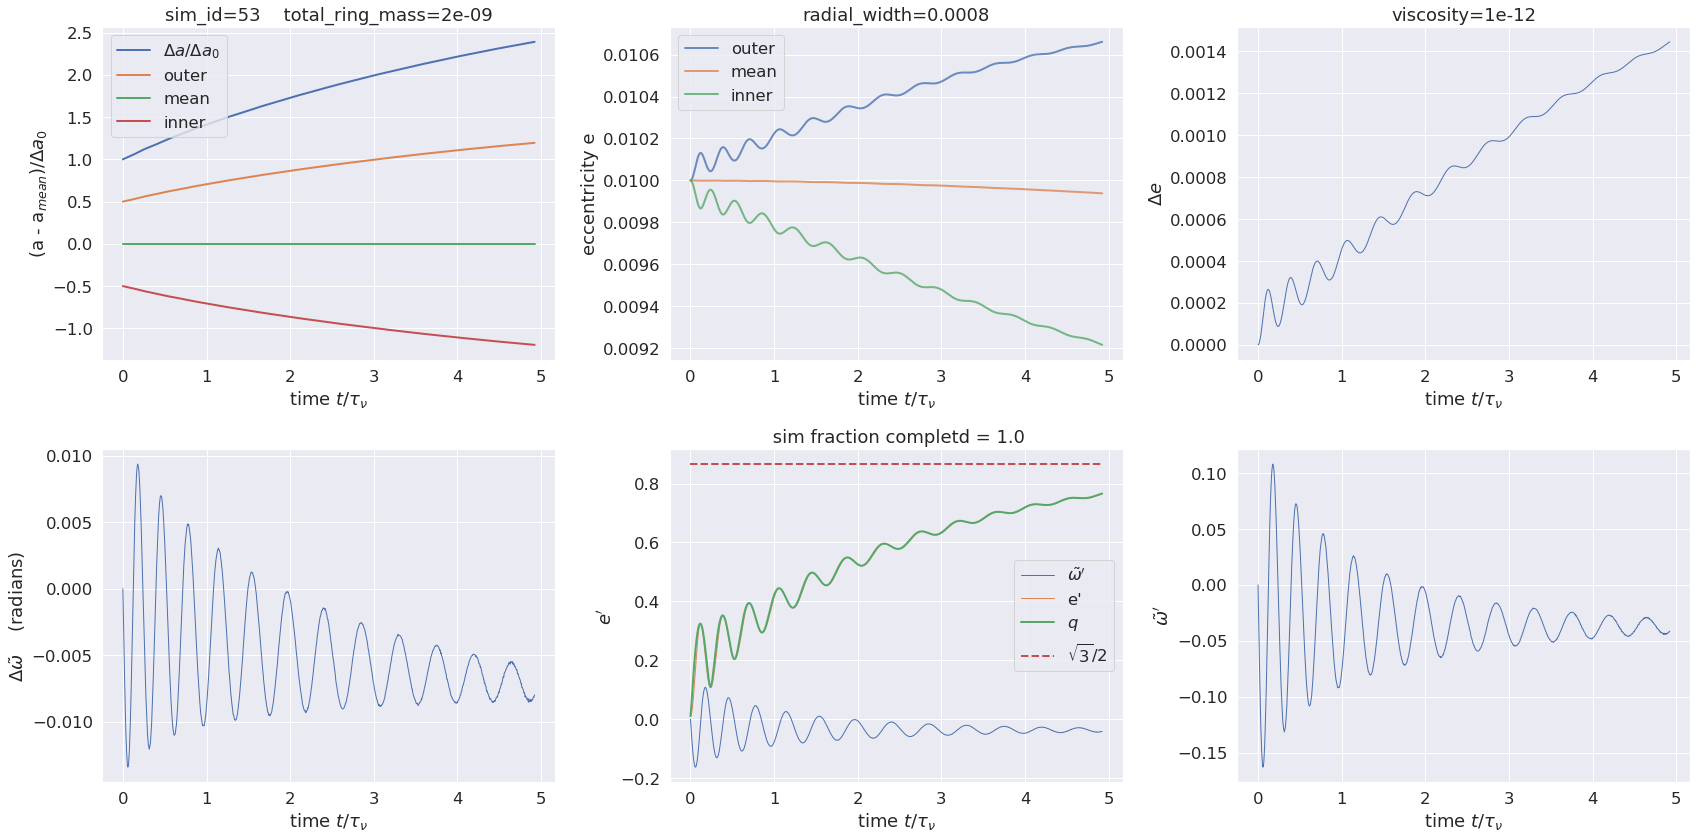

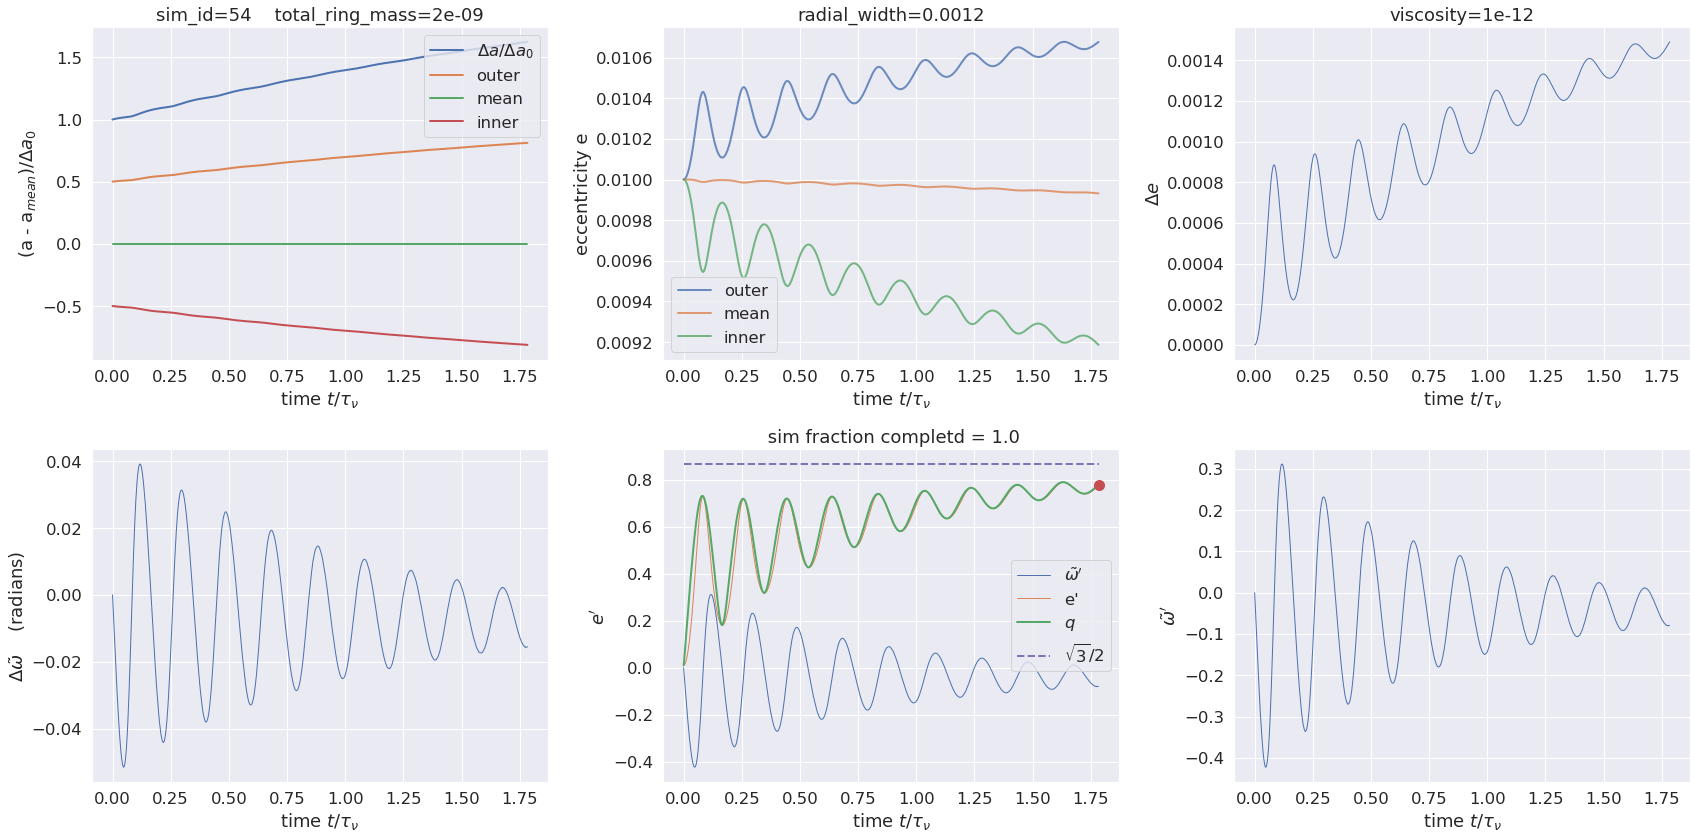

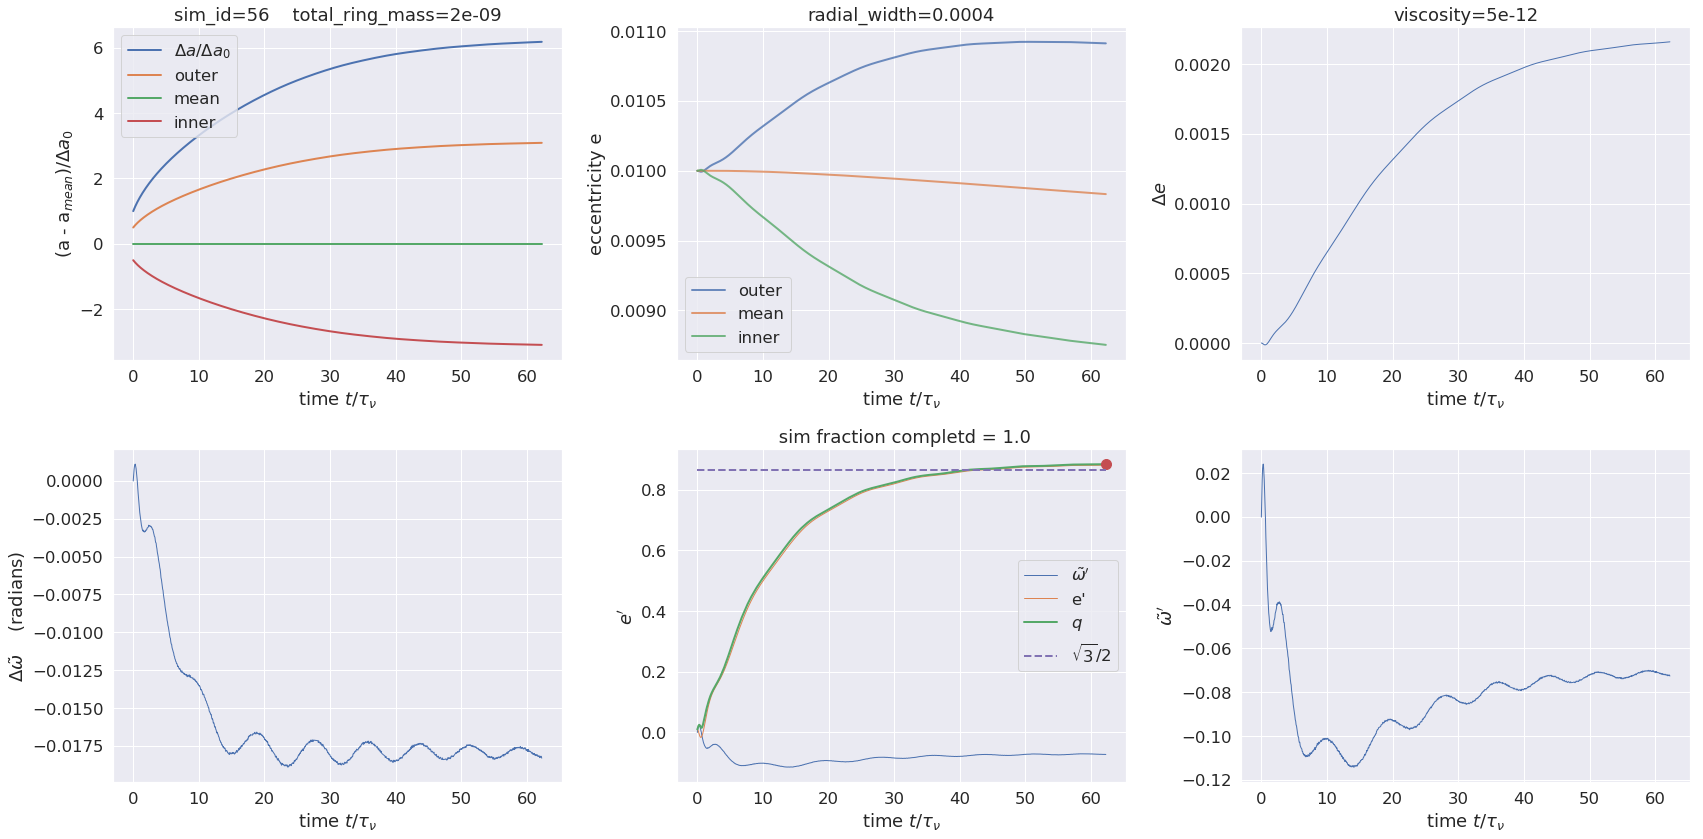

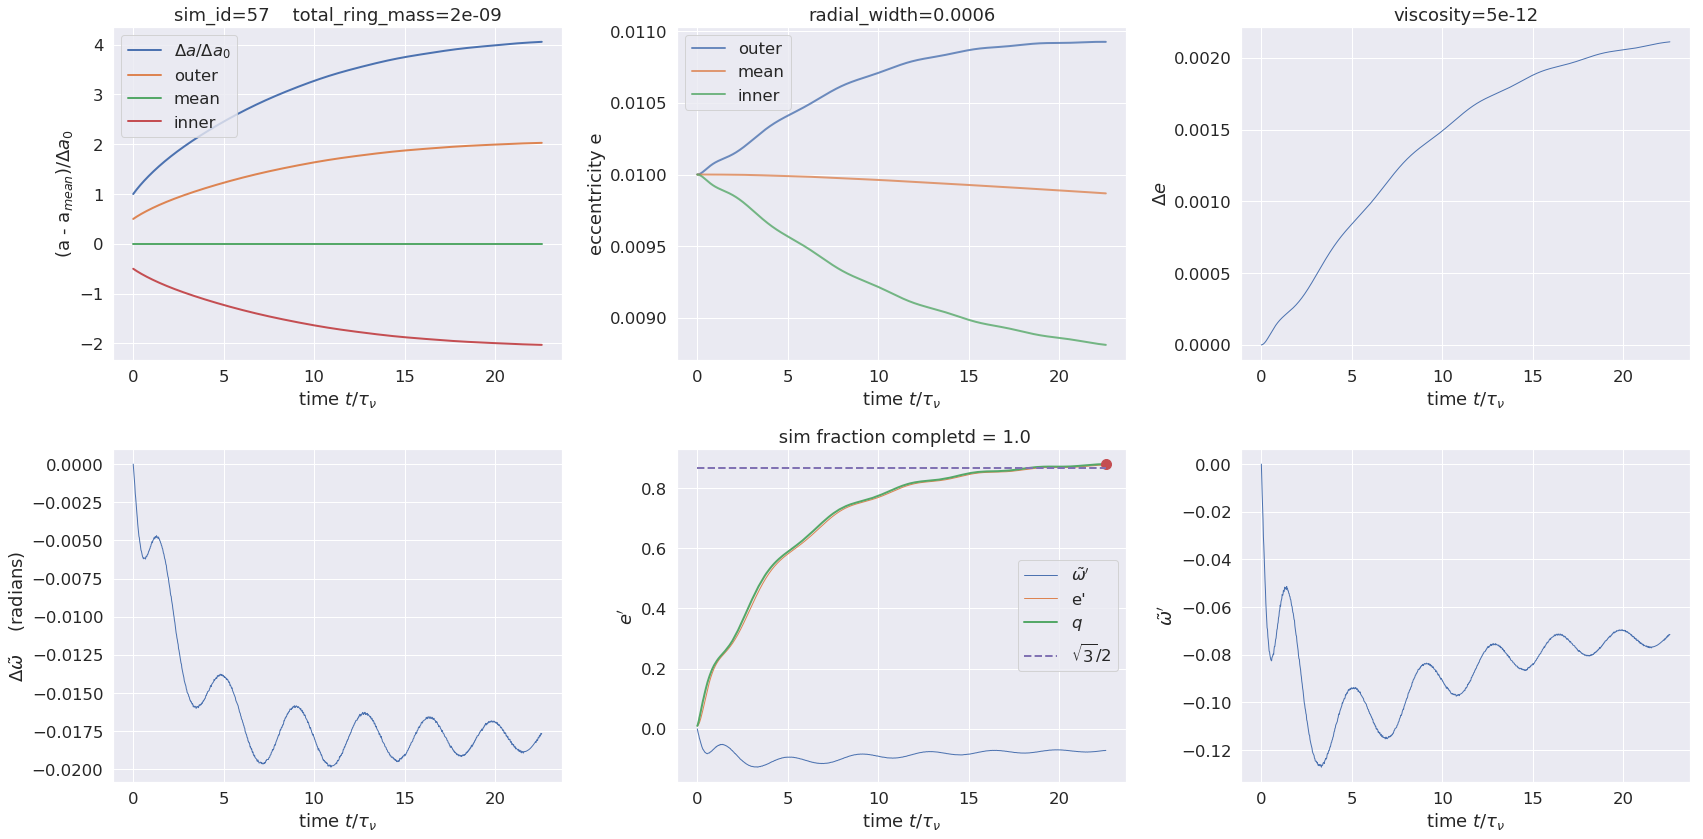

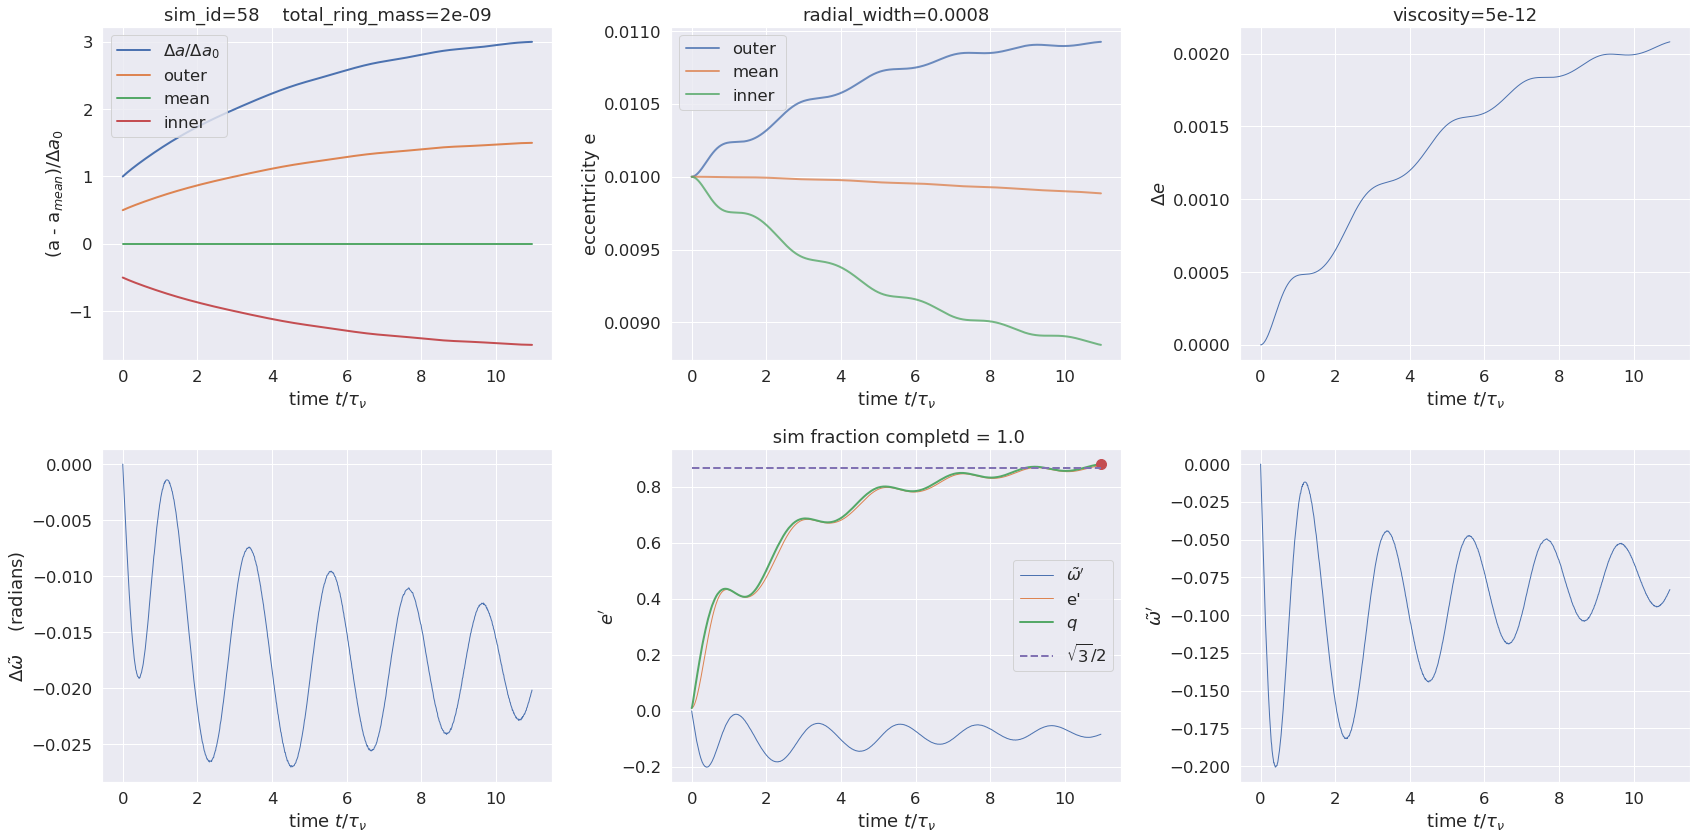

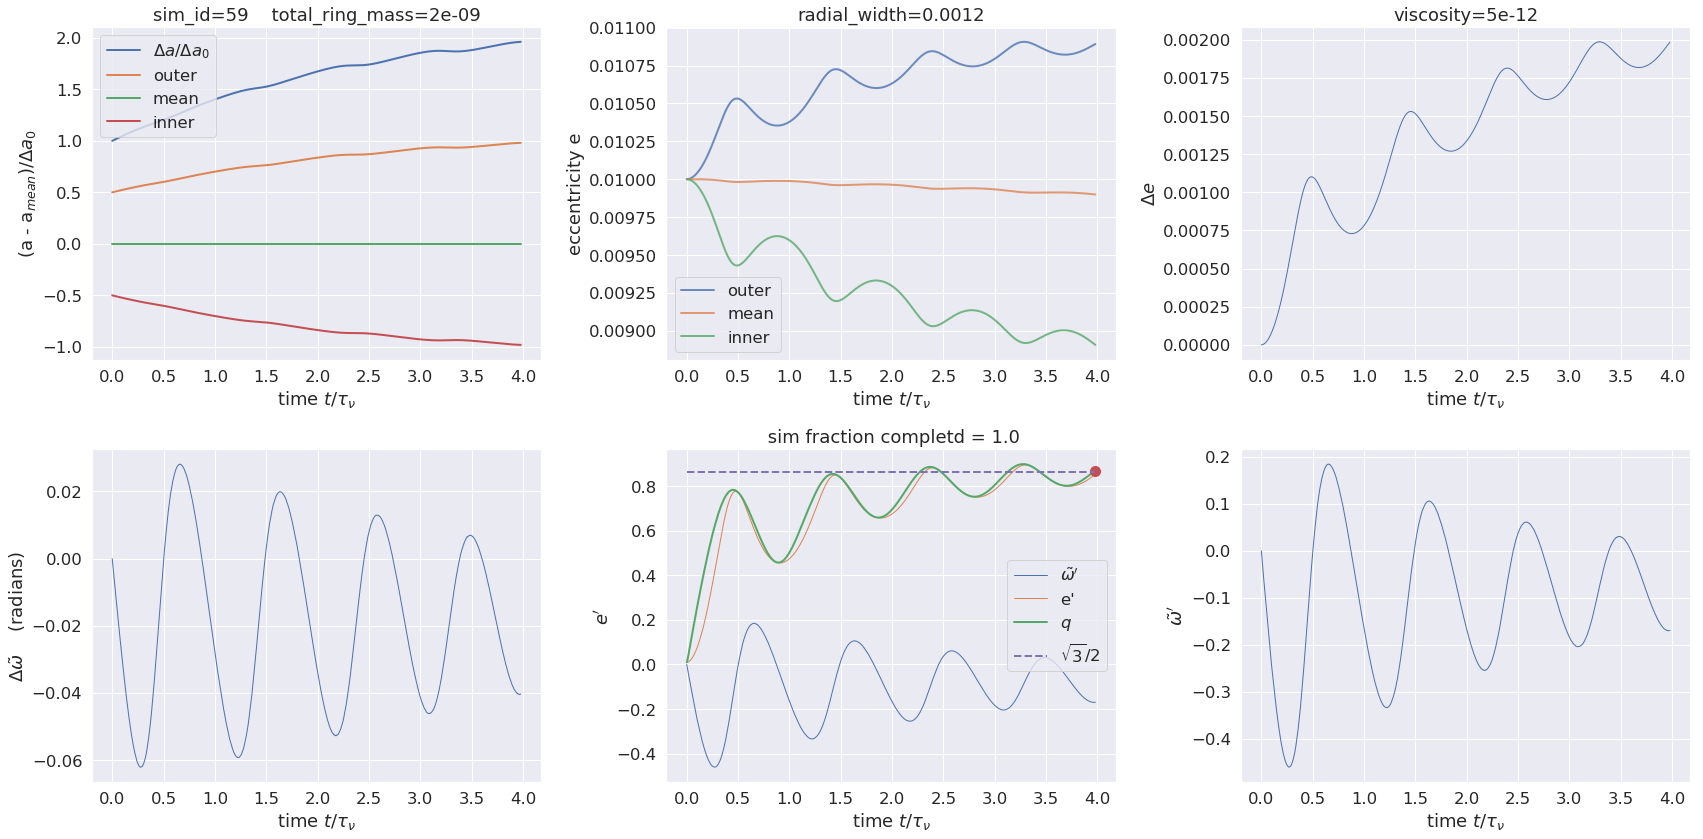

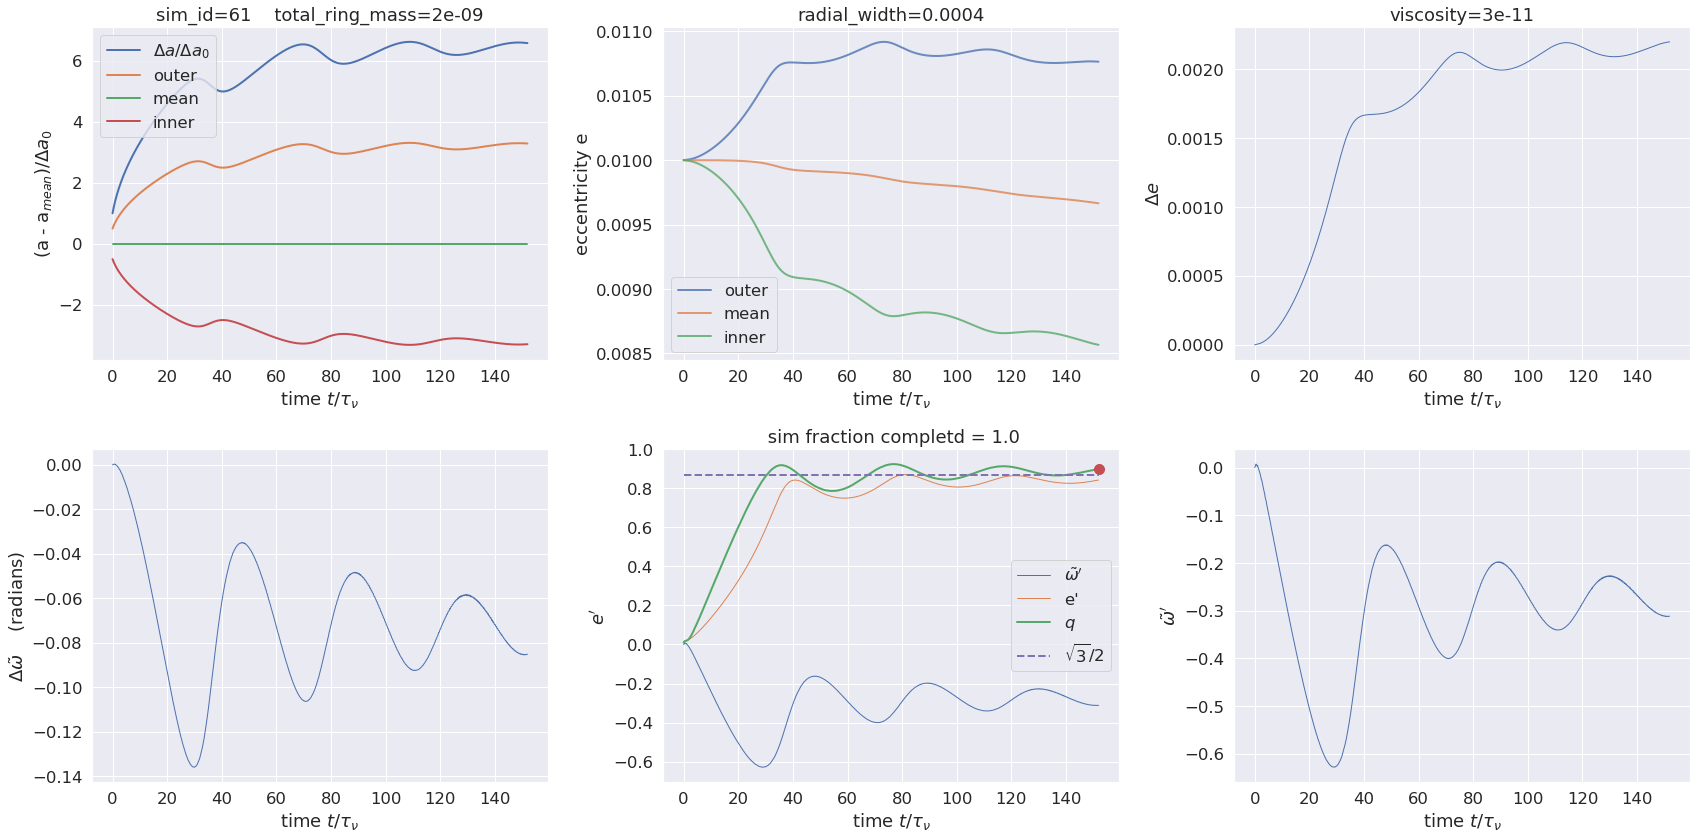

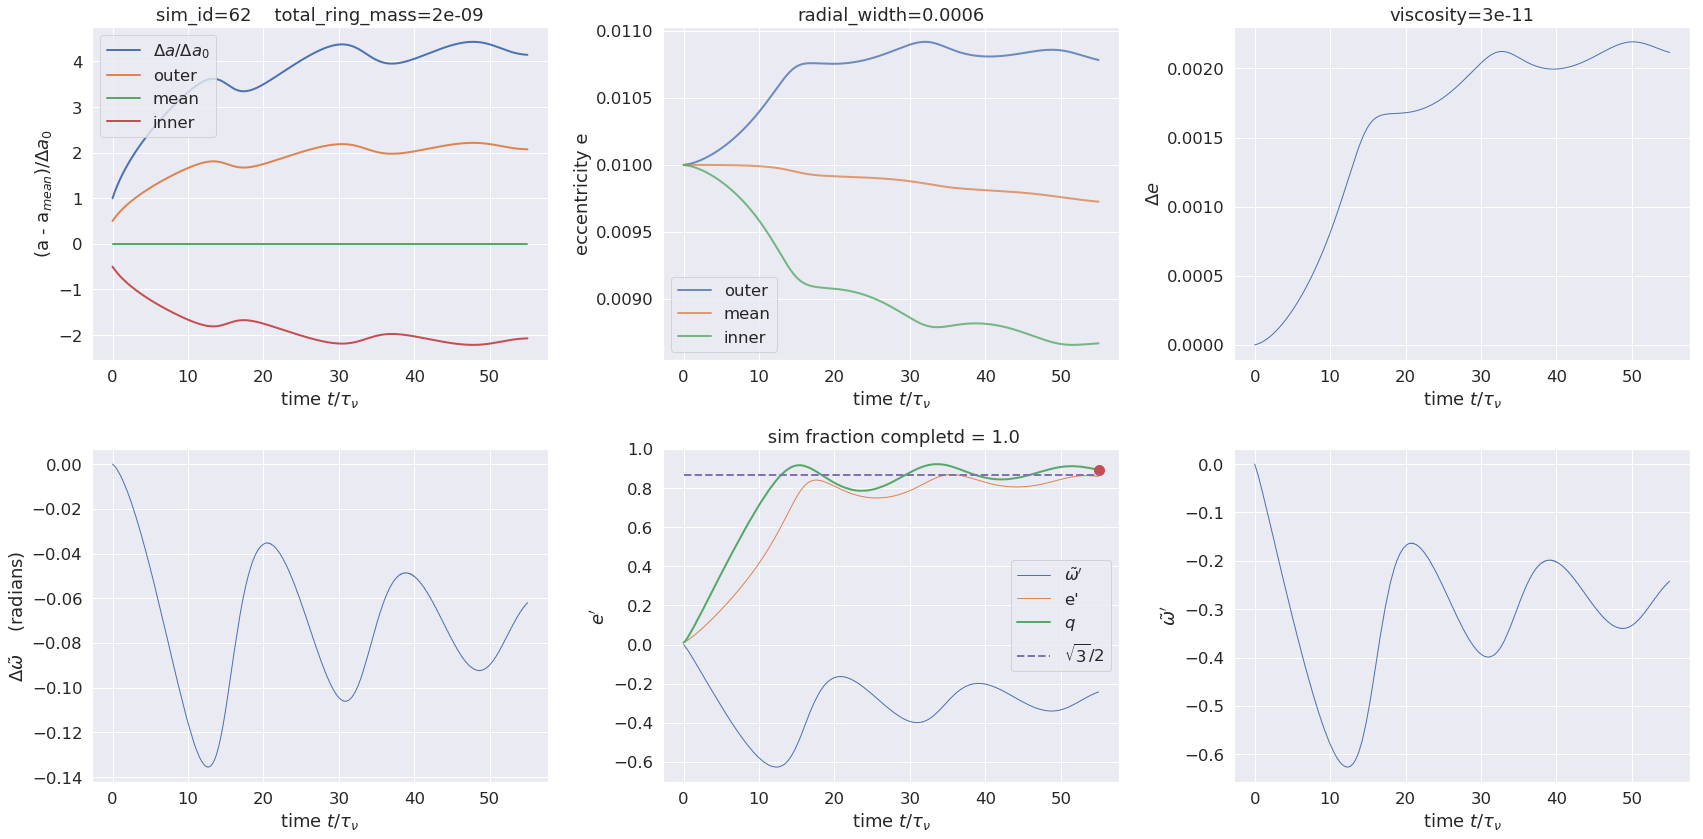

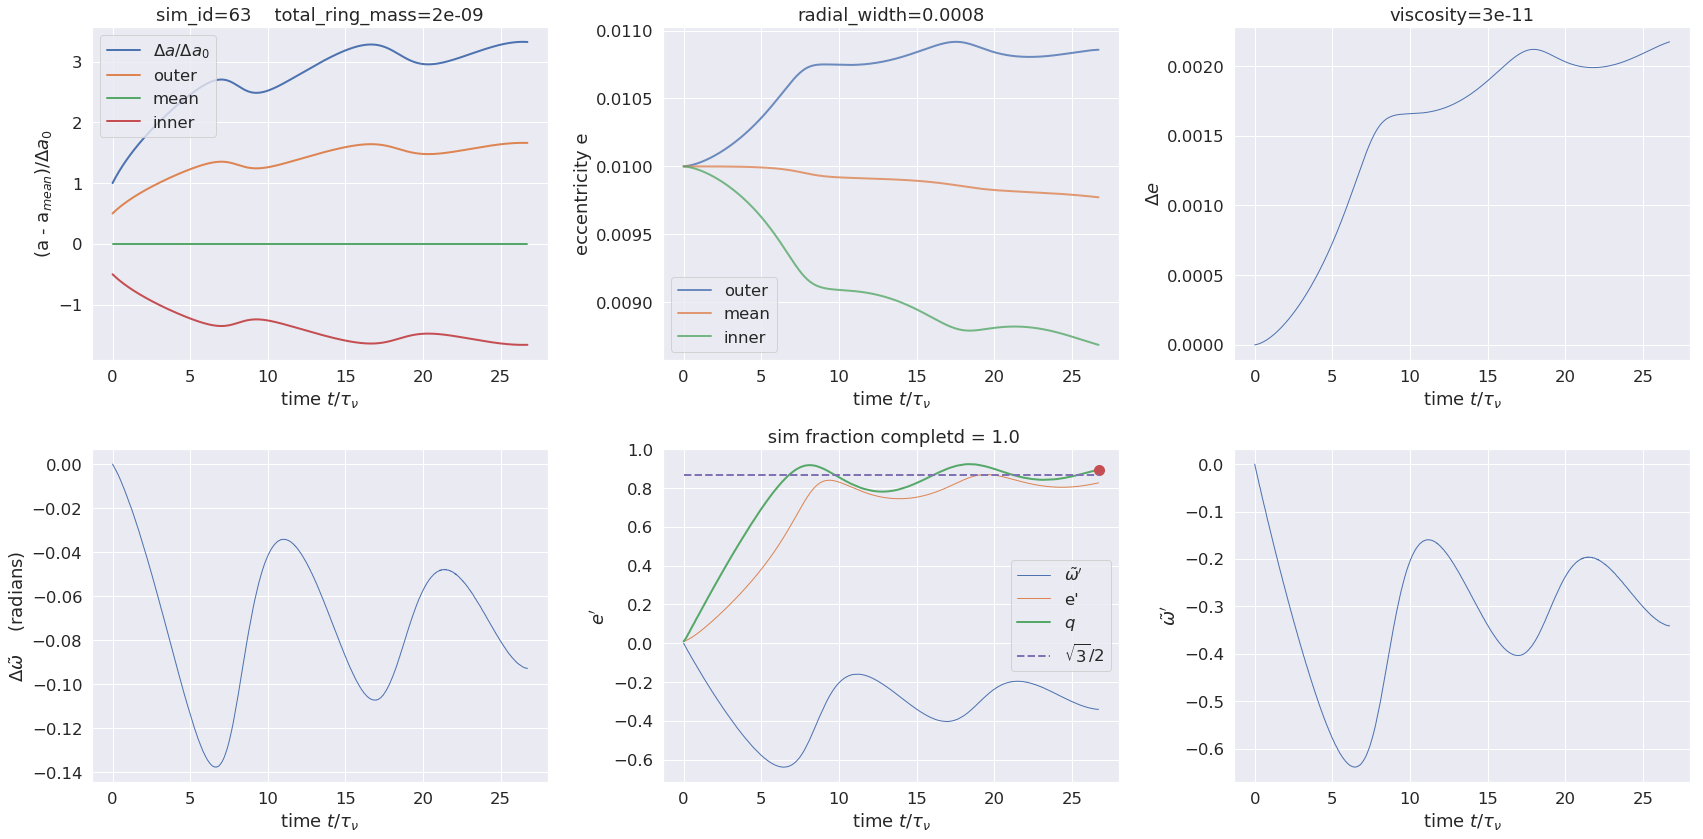

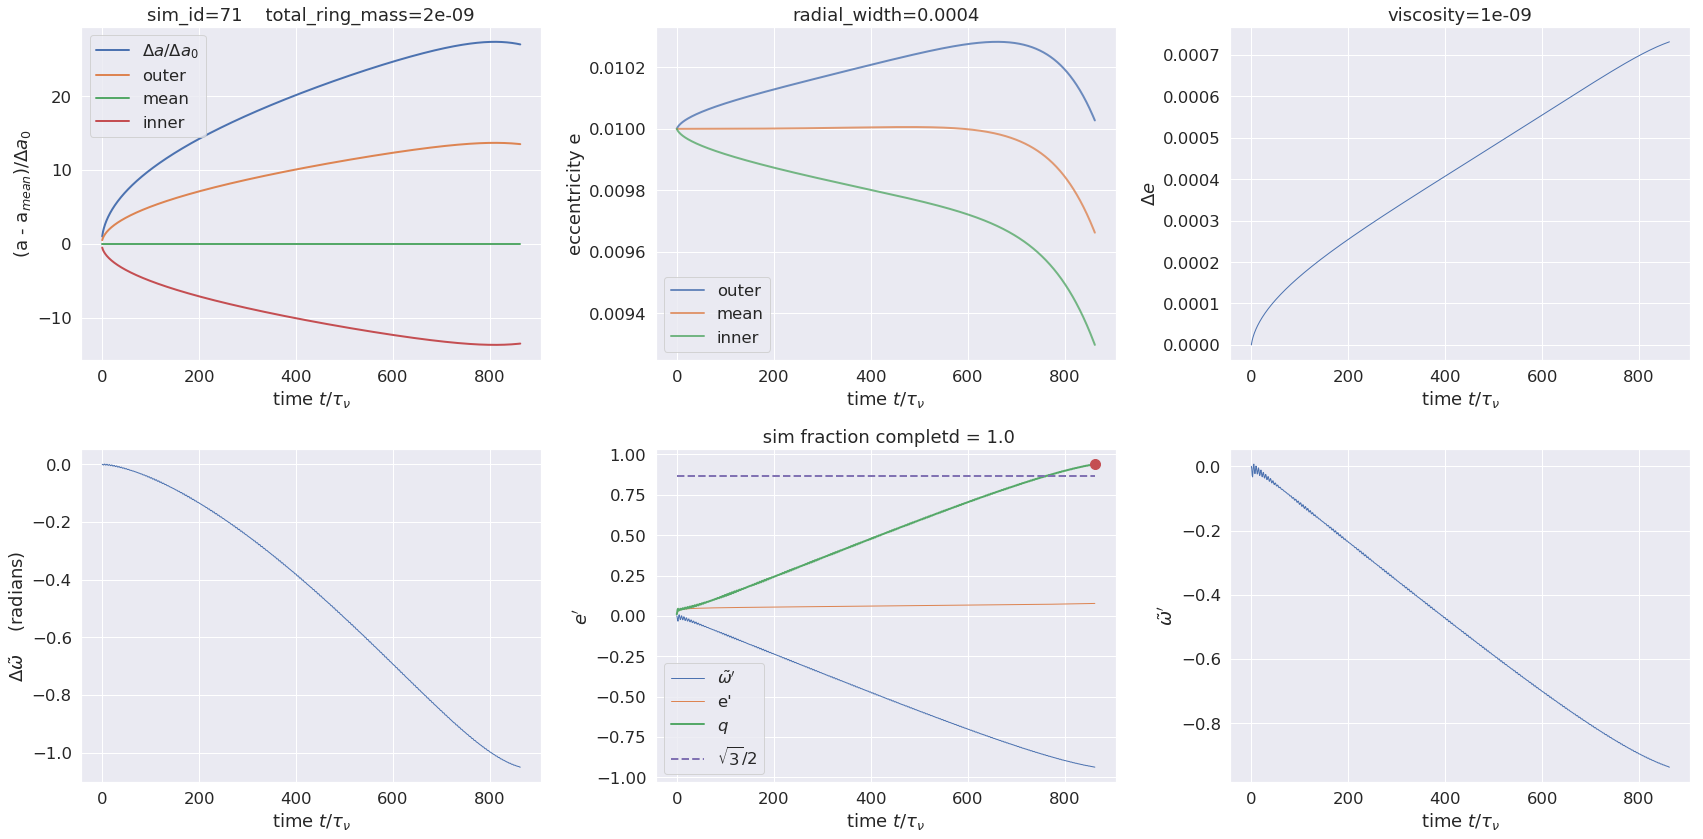

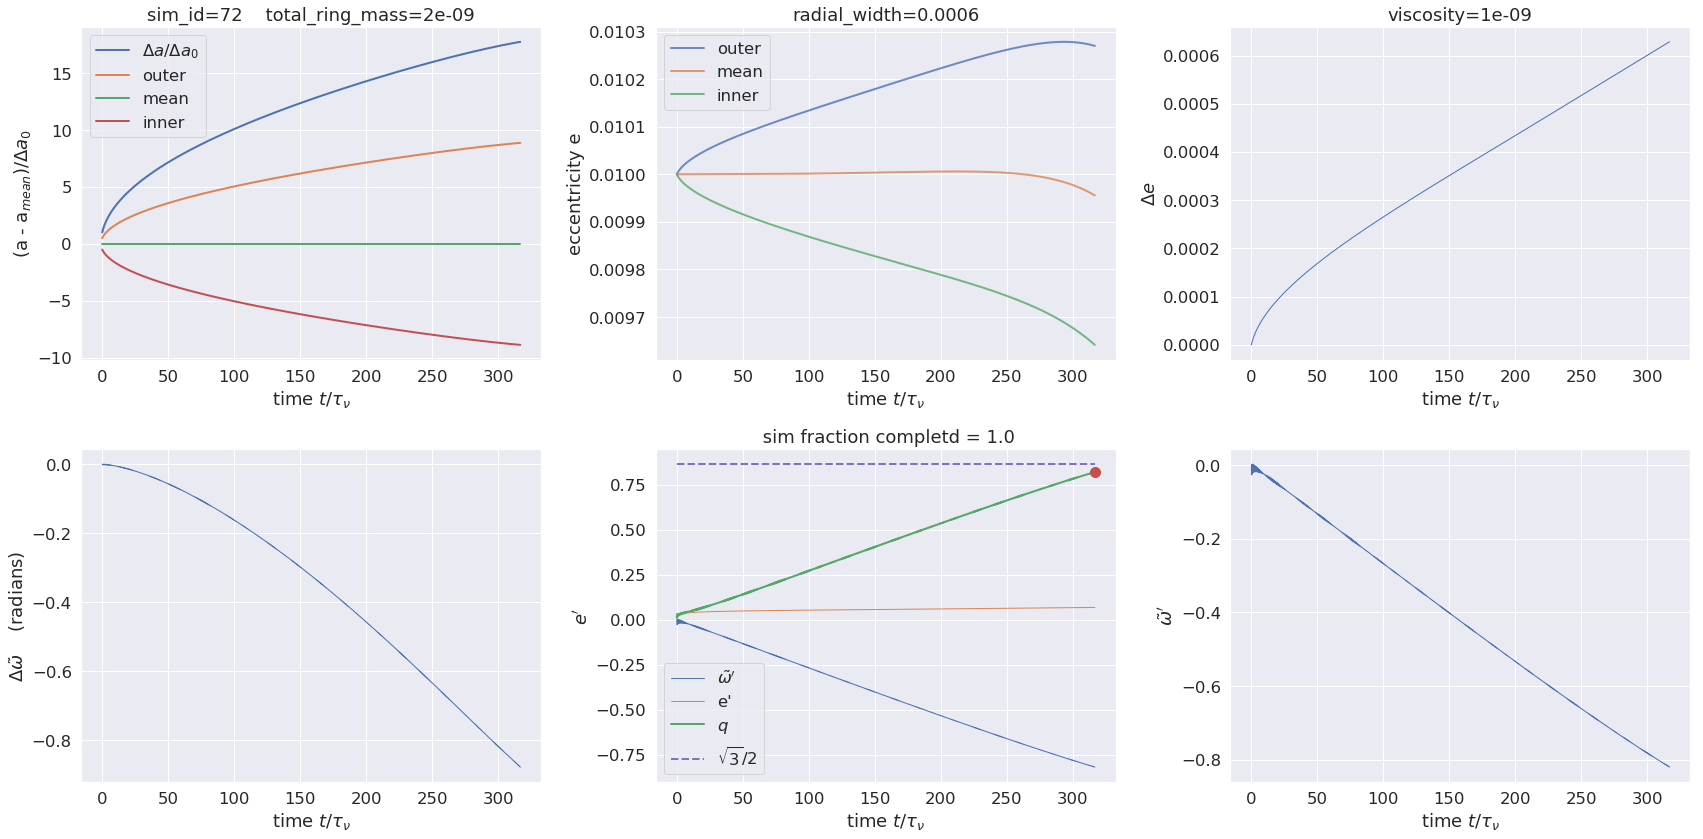

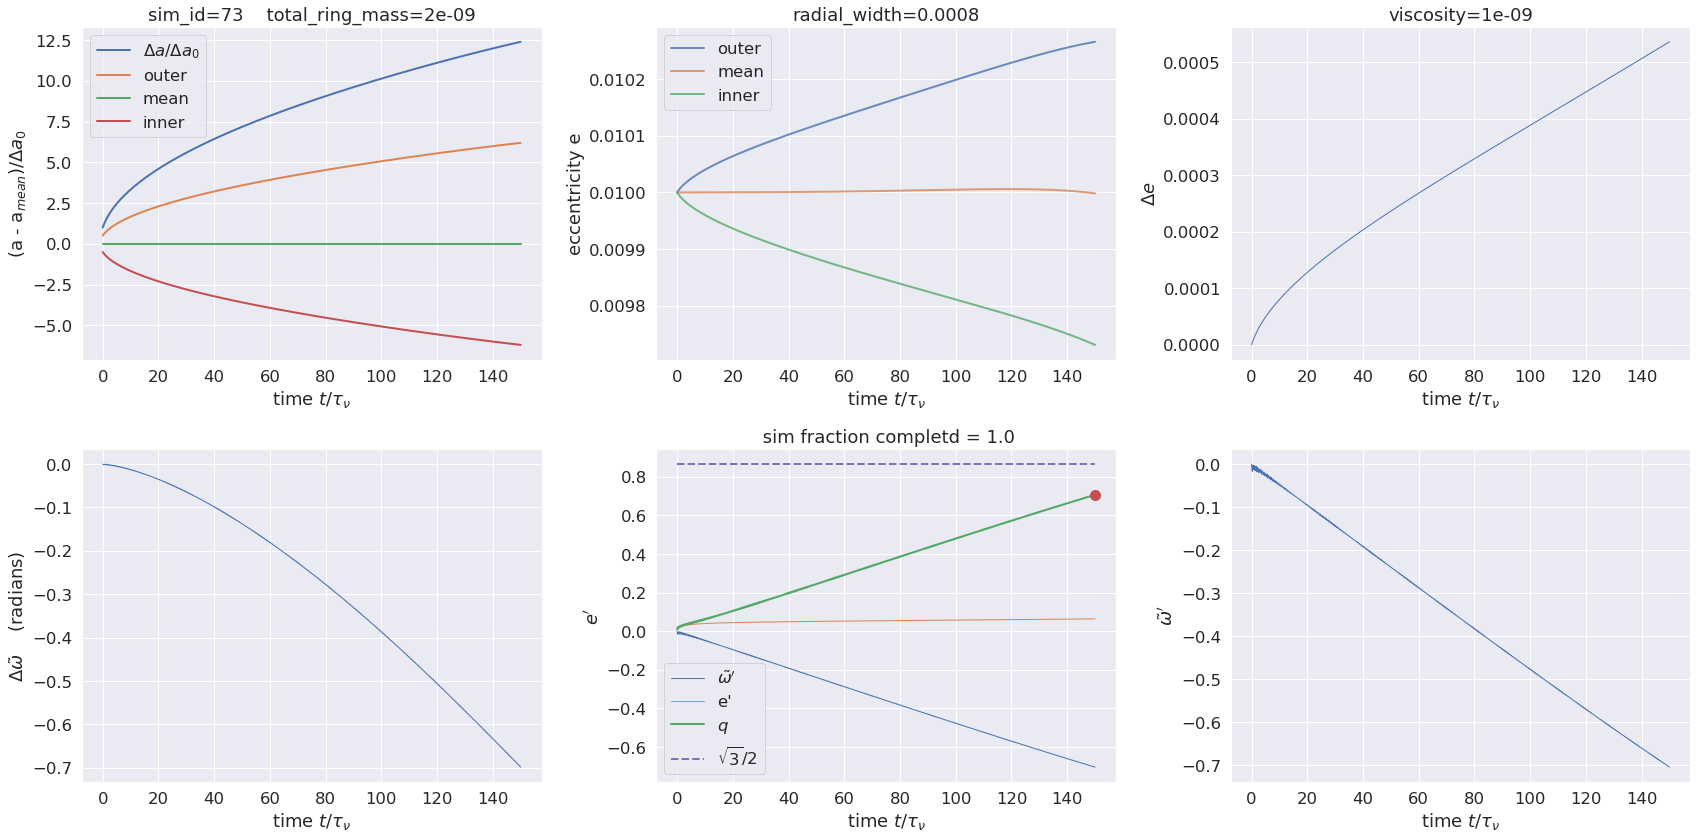

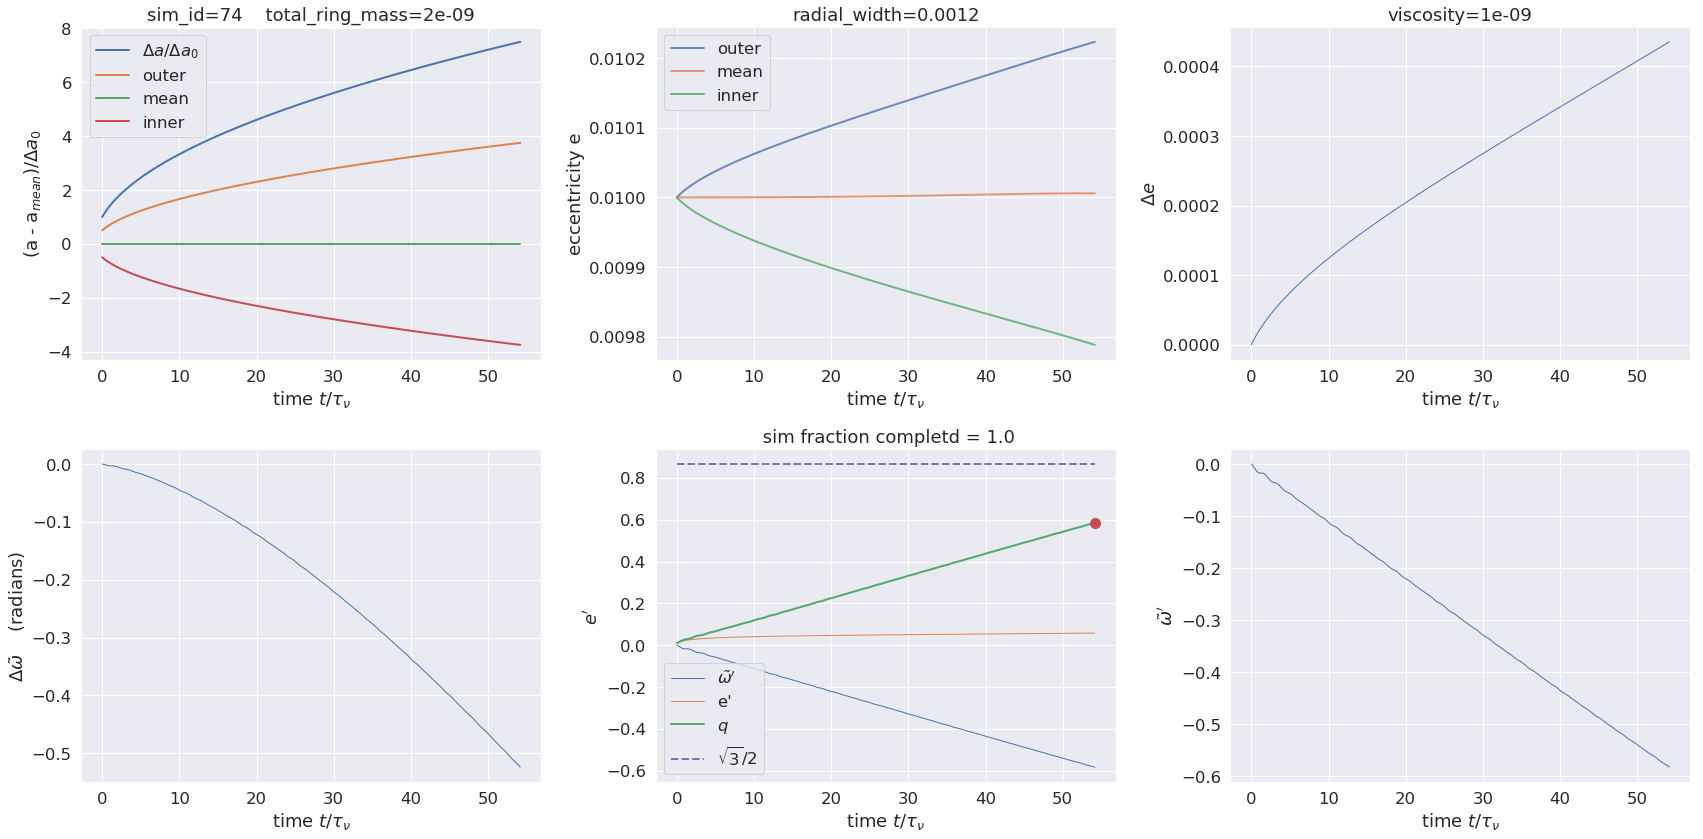

In [5]:
#generate grid of summary plots, for each sim that evolves to 100+ viscous timescales
debug = False
from helper_fns import *
from libration import *
data = []
for idx, row in paths_df.iterrows():
    
    #read simulation input and revised output
    execfile('inputs.py')
    path = row.path
    r, t, vr, vt, times, lambda0, monitor = restore_output(path)
    d = {}
    modified_params = monitor['modified_params']
    for key, val in modified_params.iteritems():
        exec(key + '=val')
        d[key] = val
    current_timestep = monitor['current_timestep']
    streamline_crossing_timestep = monitor['streamline_crossing_timestep']
    expected_timestep = timesteps_per_output*total_number_of_outputs
    d['current_timestep'] = current_timestep
    d['streamline_crossing_timestep'] = streamline_crossing_timestep
    d['expected_timestep'] = expected_timestep

    #time in units of viscous timescale
    viscous_timescale = (radial_width**2)/(12*np.abs(shear_viscosity))
    times_viscous = times/viscous_timescale
    d['times_viscous_max'] = int(times_viscous.max())
    
    #calculate differences da, de, dwt between outer & inner streamline's periapse
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, a, e, wt)
    da_init = da[0]
    
    #report on sims that execute without crossing streamlines
    #if (times_viscous.max() > -1):
    if (current_timestep == expected_timestep):

        if (debug):
            print 'path = ', path
            print 'total_ring_mass = ', total_ring_mass
            print 'radial_width = ', radial_width
            print 'shear_viscosity = ', shear_viscosity
            print 'viscous_timescale = ', viscous_timescale
            print 'current, expected timesteps = ', current_timestep, expected_timestep
            print 'execution time (minutes) = ', (monitor['current_time'] - monitor['start_time'])/60.0
        

        
        #create grid of plots
        sns.set(font_scale=1.5, font='DejaVu Sans')
        fig, axs = plt.subplots(2, 3, figsize=(24, 12))
        
        #plot streamline's mutual a-evolution
        ax = axs[0][0]
        x = times_viscous
        y = da/da_init
        p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta a/\Delta a_0$')
        y = (a_outer - a_mean)/da_init
        p = ax.plot(x, y, linestyle='-', linewidth=2, label='outer')
        y = (a_mean - a_mean)/da_init
        p = ax.plot(x, y, linestyle='-', linewidth=2, label='mean')
        y = (a_inner - a_mean)/da_init
        p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='inner')
        p = ax.set_xlabel(r'time $t/\tau_\nu$')
        p = ax.set_ylabel('(a - a$_{mean})/\Delta a_0$')
        title = 'sim_id=' + str(sim_id) + '    total_ring_mass=' + str(total_ring_mass)
        p = ax.set_title(title)
        p = ax.legend()
        p = plt.tight_layout()

        #plot streamline's e-evolution
        ax = axs[0][1]
        x = times_viscous
        y = e_outer
        p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
        y = e_mean
        p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='mean')
        y = e_inner
        p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
        p = ax.set_ylabel('eccentricity e')
        p = ax.set_xlabel(r'time $t/\tau_\nu$')
        title = 'radial_width=' + str(radial_width)
        p = ax.set_title(title)
        p = ax.legend()
        p = plt.tight_layout()
        
        #plot delta_e versus time
        ax = axs[0][2]
        x = times_viscous
        y = de
        p = ax.plot(x, y, linestyle='-', linewidth=1)
        p = ax.set_xlabel(r'time $t/\tau_\nu$')
        p = ax.set_ylabel(r'$\Delta e$')
        title = 'viscosity=' + str(shear_viscosity)
        p = ax.set_title(title)
        p = plt.tight_layout()
        
        #plot dwt versus time
        ax = axs[1][0]
        x = times_viscous
        y = dwt
        p = ax.plot(x, y, linestyle='-', linewidth=1)
        p = ax.set_xlabel(r'time $t/\tau_\nu$')
        p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')
        p = plt.tight_layout()
        
        #compute e_prime, wt_prime, q to lowest order, and H(q)
        H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
        
        #plot e_prime wt_prime and q versus time
        ax = axs[1][1]
        x = times_viscous
        y = wt_prime
        p = ax.plot(x, y, linestyle='-', linewidth=1, label=r"$\tilde{\omega}'$")
        y = e_prime
        p = ax.plot(x, y, linestyle='-', linewidth=1, label="e'")
        y = q
        p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$q$')
        if (streamline_crossing_timestep == None):
            p = ax.plot(x[-1], y[-1], marker='o', markersize=10, label='')
        p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dashed', linewidth=2, label=r"$\sqrt{3}/2$")
        title = ' sim fraction completd = ' + str(current_timestep*1.0/expected_timestep)
        p = ax.set_title(title)
        p = ax.set_xlabel(r'time $t/\tau_\nu$')
        p = ax.set_ylabel(r"$e'$")
        p = ax.legend()
        p = plt.tight_layout()
        idx = (times_viscous > 0.8*times_viscous.max())
        d['q'] = q[idx].mean()
        d['delta_q'] = 0.5*(q[idx].max() - q[idx].min())
        
        #plot wt_prime versus time
        ax = axs[1][2]
        x = times_viscous
        y = wt_prime
        p = ax.plot(x, y, linestyle='-', linewidth=1)
        p = ax.set_xlabel(r'time $t/\tau_\nu$')
        p = ax.set_ylabel(r"$\tilde{\omega}'$")
        p = plt.tight_layout()
        idx = (times_viscous > 0.8*times_viscous.max())
        d['wt_prime'] = wt_prime[idx].mean()
    data += [d]
df = pd.DataFrame(data)
cols = ['sim_id', 'expected_timestep', 'current_timestep', 'streamline_crossing_timestep', 'times_viscous_max', 
    'total_ring_mass', 'radial_width', 'shear_viscosity', 'q', 'delta_q']
df = df[cols].sort_values('sim_id').reset_index(drop=True)
df

In [6]:
df[120:130]

sim_id  expected_timestep  current_timestep  \
120     120             830000             41500   
121     121             586000             58600   
122     122             479000             47900   
123     123             415000             41500   
124     124             338000             50700   

     streamline_crossing_timestep  times_viscous_max  total_ring_mass  \
120                       29480.0               6225     5.000000e-08   
121                       32916.0               2197     5.000000e-08   
122                       36305.0                798     5.000000e-08   
123                       36463.0                389     5.000000e-08   
124                       40411.0                211     5.000000e-08   

     radial_width  shear_viscosity   q  delta_q  
120        0.0002     1.000000e-09 NaN      NaN  
121        0.0004     1.000000e-09 NaN      NaN  
122        0.0006     1.000000e-09 NaN      NaN  
123        0.0008     1.000000e-09 NaN      NaN  
124        0.0012     1.000000e-09 NaN      NaN

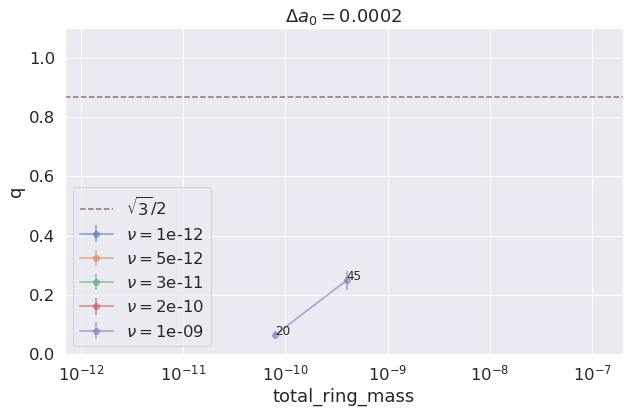

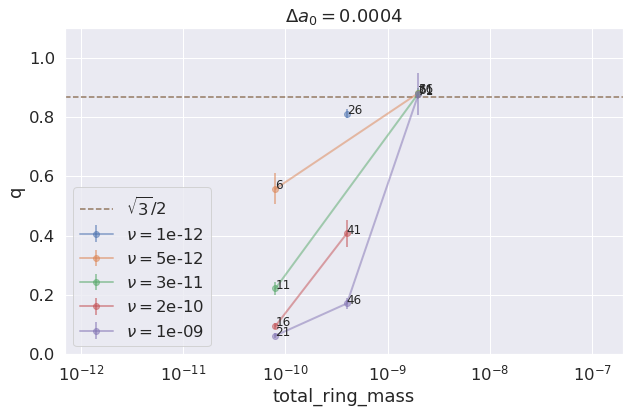

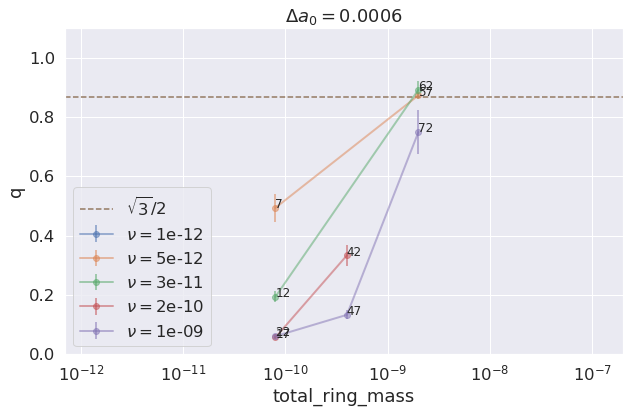

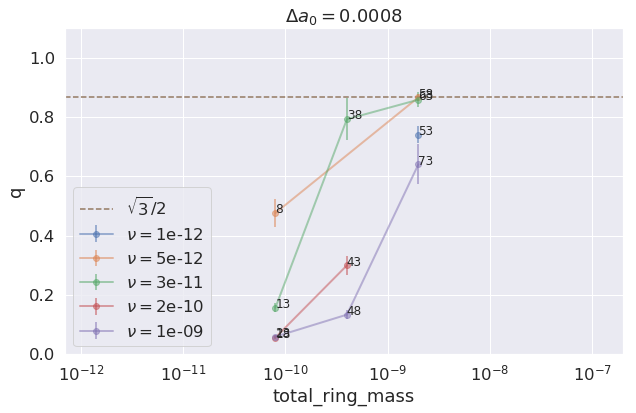

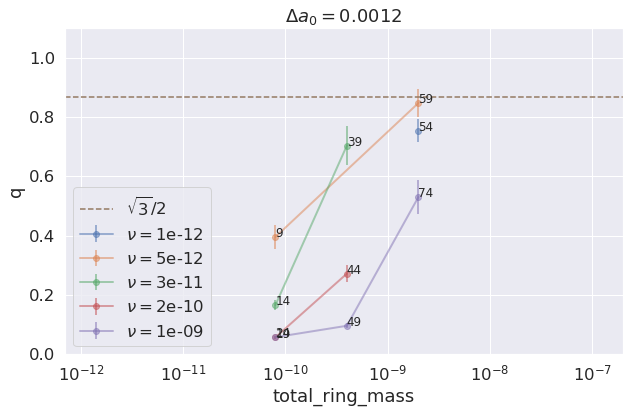

In [7]:
#plot q vs total_ring_mass, for each radial_width and shear_viscosity
shear_viscosities = df.shear_viscosity.sort_values().unique()
radial_widths = df.radial_width.sort_values().unique()
xlim = np.array([7.0e-13, 2.0e-7])
for radial_width in radial_widths:
    sns.set(font_scale=1.5, font='DejaVu Sans')
    f, ax = plt.subplots(figsize=(10, 6))
    idx = (df.radial_width == radial_width)
    dfs = df[idx]
    xp = dfs.total_ring_mass
    yp = dfs.q
    for idx, shear_viscosity in enumerate(shear_viscosities):
        jdx = (dfs.shear_viscosity == shear_viscosity) & (dfs.q > 0)
        dfss = dfs[jdx].sort_values('total_ring_mass')
        xp = dfss.total_ring_mass
        yp = dfss.q
        err = dfss.delta_q
        label = r'$\nu=$' + str(shear_viscosity)
        p = ax.errorbar(xp, yp, err, marker='o', alpha=0.5, markersize=6, linestyle='-', linewidth=2, label=label)
        id_str = dfss.sim_id.astype(str).values.tolist()
        xy = zip(xp, yp)
        for jdx, s in enumerate(id_str):
            p = ax.annotate(s, xy[jdx], fontsize=12)
    xp = xlim
    yp = xp*0 + np.sqrt(3)/2
    p = ax.plot(xp, yp, linestyle='dashed', label=r'$\sqrt{3}/2$')
    title = r'$\Delta a_0=$' + str(radial_width)
    p = ax.set_title(title)
    p = ax.set_xlabel('total_ring_mass')
    p = ax.set_ylabel('q')
    p = ax.set_xscale('log')
    p = ax.legend()
    p = ax.set_xlim(xlim)
    p = ax.set_ylim(0, 1.1)

In [8]:
print df.total_ring_mass.unique()
print df.radial_width.unique()
print df.shear_viscosity.unique()

[8.e-11 4.e-10 2.e-09 1.e-08 5.e-08]
[0.0002 0.0004 0.0006 0.0008 0.0012]
[1.e-12 5.e-12 3.e-11 2.e-10 1.e-09]
